# VAX

Vaccinations in the World.

> Max Pierini

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set()

from IPython.display import display, Markdown

In [2]:
df = pd.read_csv(
    'https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/vaccinations.csv',
    parse_dates=['date']
)

In [3]:
www = df[df.location=='World'].set_index('date')

In [4]:
latest_www = www.iloc[-1]

In [5]:
vax_Y = www[-7:].total_vaccinations.values.ravel()
vax_X = www.reset_index().index[-7:]
vax_X = sm.add_constant(vax_X)
mod = sm.OLS(vax_Y, vax_X)
res = mod.fit()
VAX_n = res.params[1]
vax_i = res.params[0]

In [6]:
Markdown(fr"""
Latest update: {latest_www.name.date()}

- Total vaccinated in the world: {latest_www.people_vaccinated:,.0f}
    - People fully vaccinated in the world: {latest_www.people_fully_vaccinated:,.0f}

***

- Average vaccinated per day (last week): {VAX_n:,.0f} per day

***

- Percentage of vaccinated in the world: {latest_www.people_vaccinated_per_hundred:,.2f}%
    - Percentage of fully vaccinated in the world: {latest_www.people_fully_vaccinated_per_hundred:,.2f}%
""")


Latest update: 2021-01-31

- Total vaccinated in the world: 55,339,596
    - People fully vaccinated in the world: 10,684,455

***

- Average vaccinated per day (last week): 5,263,649 per day

***

- Percentage of vaccinated in the world: 0.71%
    - Percentage of fully vaccinated in the world: 0.14%


# WORLD

In [7]:
VAX_pred = vax_i + np.arange(14) * VAX_n

In [8]:
pred_dates = pd.date_range(
    www.index[-6].date(),
    www.index[-6] + pd.Timedelta(days=13),
)

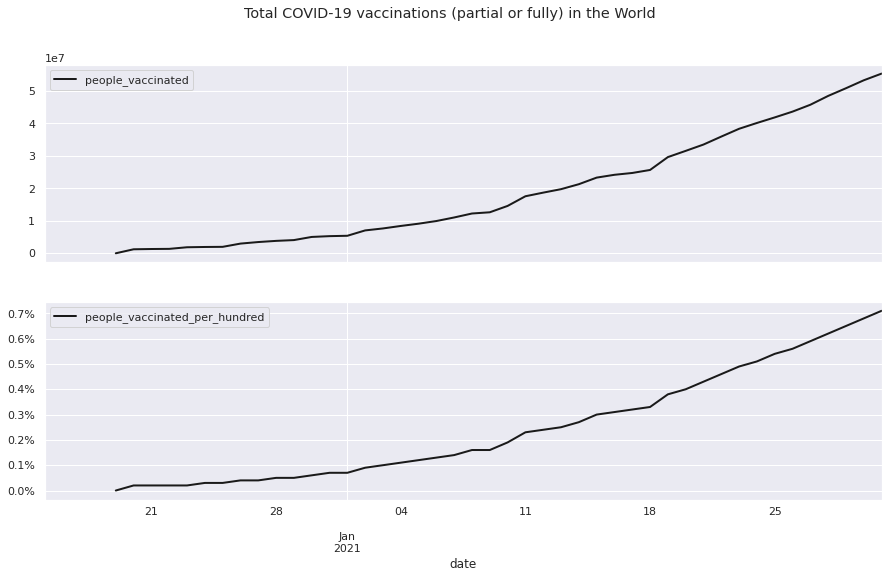

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
for i, col in enumerate(['people_vaccinated', 'people_vaccinated_per_hundred']):
    www.plot(y=col, ax=ax.flat[i], lw=2, color='k')
#ax[0].plot(pred_dates, VAX_pred, ls=':', color='k', label='7 days prediction')
xlim = ax[0].get_xlim()
#ax[0].set(
#    xlim=(xlim[0], pred_dates[-1])
#)
ax[0].legend()
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(100, 1))
fig.suptitle('Total COVID-19 vaccinations (partial or fully) in the World')
plt.show()

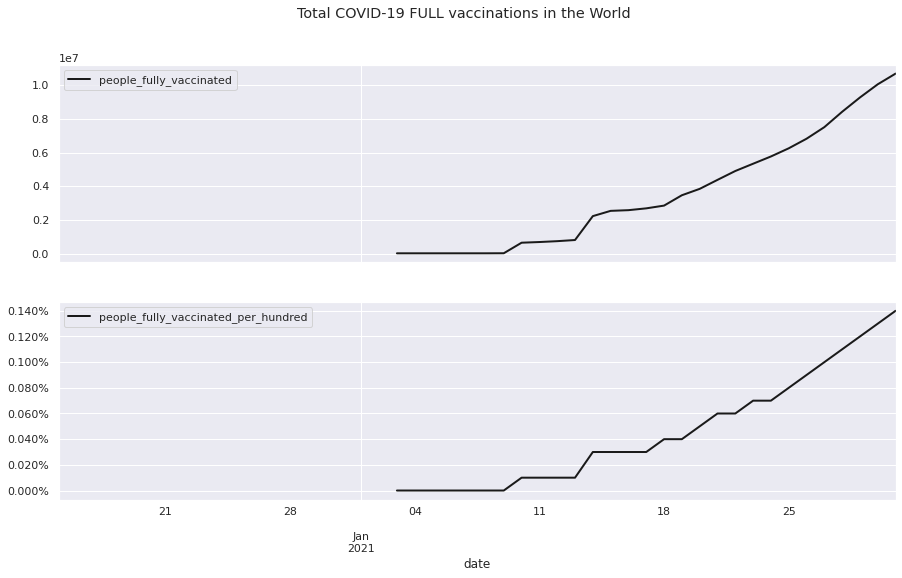

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
for i, col in enumerate(['people_fully_vaccinated', 'people_fully_vaccinated_per_hundred']):
    www.plot(y=col, ax=ax.flat[i], lw=2, color='k')
#ax[0].plot(pred_dates, VAX_pred, ls=':', color='k', label='7 days prediction')
#xlim = ax[0].get_xlim()
#ax[0].set(
#    xlim=(xlim[0], pred_dates[-1])
#)
#ax[0].legend()
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(100, 3))
fig.suptitle('Total COVID-19 FULL vaccinations in the World')
plt.show()

# COUNTRIES

## partial

In [11]:
latest = df.groupby('location')[['date', 'people_vaccinated']].max()

latest = latest[latest.index!='World']

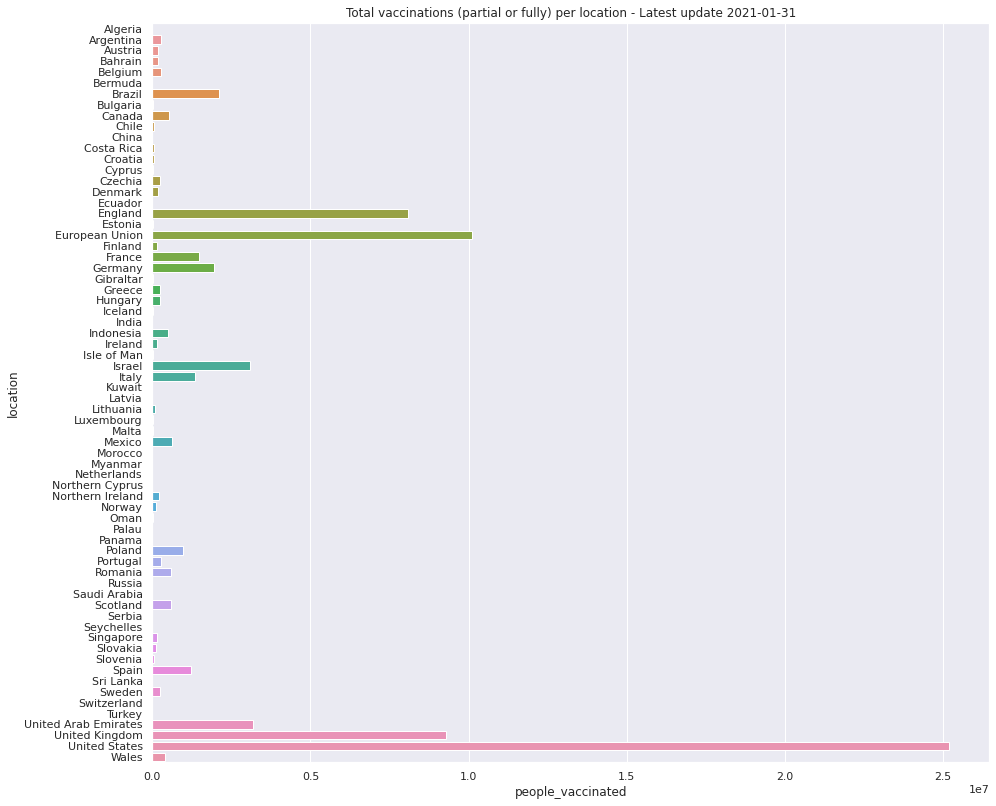

In [12]:
fig, ax = plt.subplots(figsize=(15, latest.index.size / 5))
sns.barplot(
    data=latest,
    y=latest.index, x='people_vaccinated',
    ax=ax
)
ax.set(
    title="Total vaccinations (partial or fully) per location - "
    fr'Latest update {www.index.max().date()}'
)
plt.show()

In [13]:
latest_pct = df.groupby('location')[['date', 'people_vaccinated_per_hundred']].max()

latest_pct = latest_pct[latest_pct.index!='World']

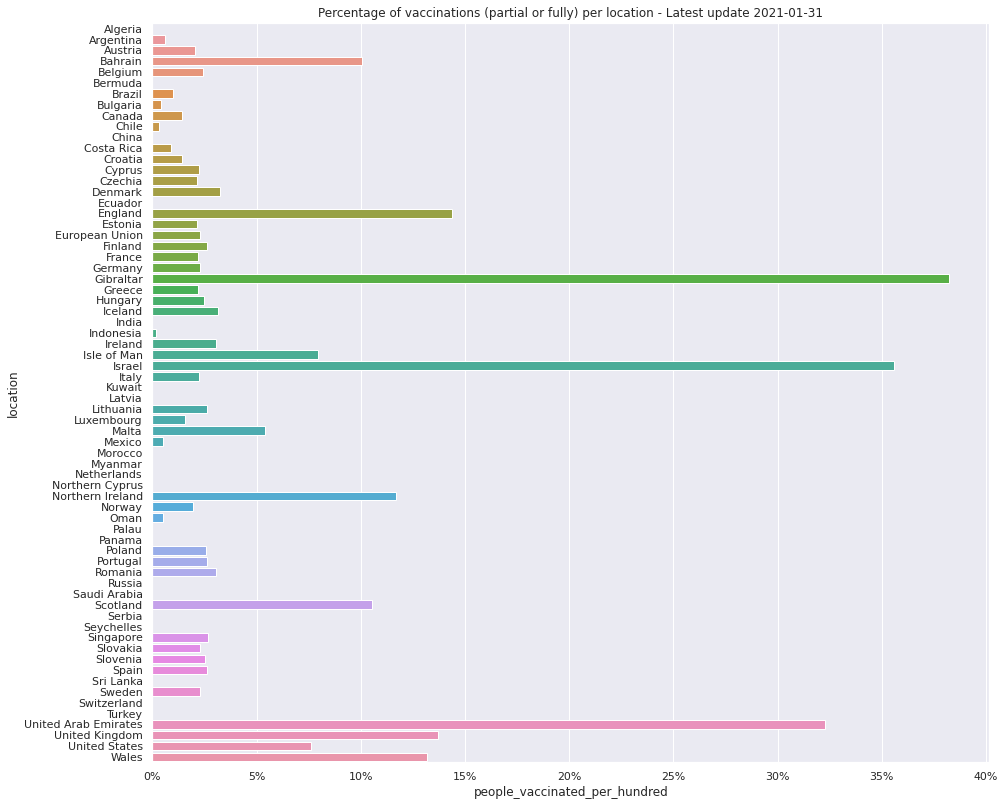

In [14]:
fig, ax = plt.subplots(figsize=(15, latest_pct.index.size / 5))
sns.barplot(
    data=latest_pct,
    y=latest_pct.index, x='people_vaccinated_per_hundred',
    ax=ax
)
ax.set(
    title="Percentage of vaccinations (partial or fully) per location - "
    fr'Latest update {www.index.max().date()}'
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(100, 0))
plt.show();

## FULL

In [15]:
latest_full = df.groupby('location')[['date', 'people_fully_vaccinated']].max()

latest_full = latest_full[latest_full.index!='World']

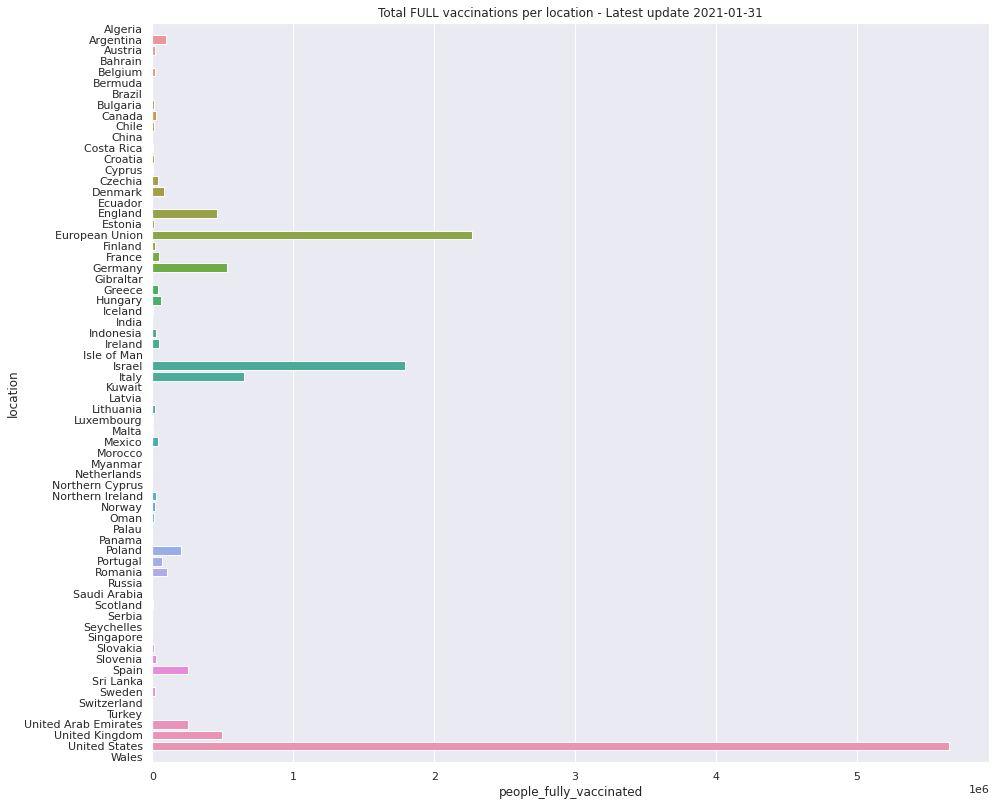

In [16]:
fig, ax = plt.subplots(figsize=(15, latest_full.index.size / 5))
sns.barplot(
    data=latest_full,
    y=latest.index, x='people_fully_vaccinated',
    ax=ax
)
ax.set(
    title="Total FULL vaccinations per location - "
    fr'Latest update {www.index.max().date()}'
)
plt.show()

In [17]:
latest_pct_full = df.groupby('location')[['date', 'people_fully_vaccinated_per_hundred']].max()

latest_pct_full = latest_pct_full[latest_pct_full.index!='World']

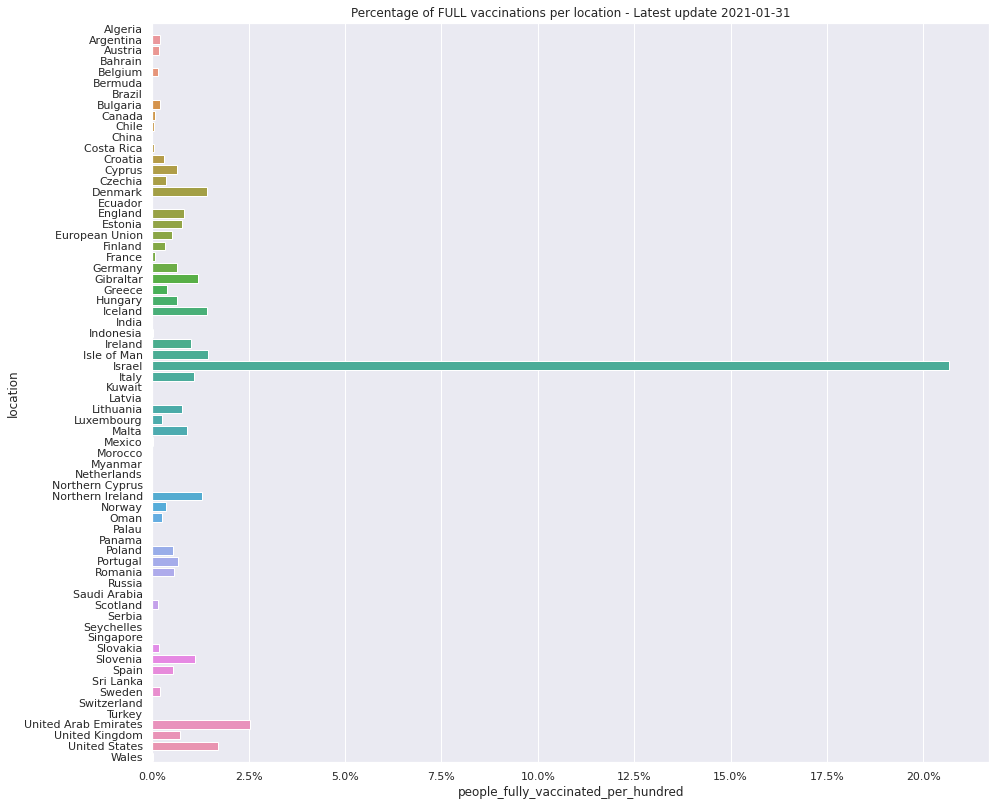

In [18]:
fig, ax = plt.subplots(figsize=(15, latest_pct_full.index.size / 5))
sns.barplot(
    data=latest_pct_full,
    y=latest_pct_full.index, x='people_fully_vaccinated_per_hundred',
    ax=ax
)
ax.set(
    title="Percentage of FULL vaccinations per location - "
    fr'Latest update {www.index.max().date()}'
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(100, 1))
plt.show();

In [19]:
columns = [
    'people_vaccinated', 'people_fully_vaccinated',
    'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'daily_vaccinations', 'daily_vaccinations_per_million'
]

# Algeria

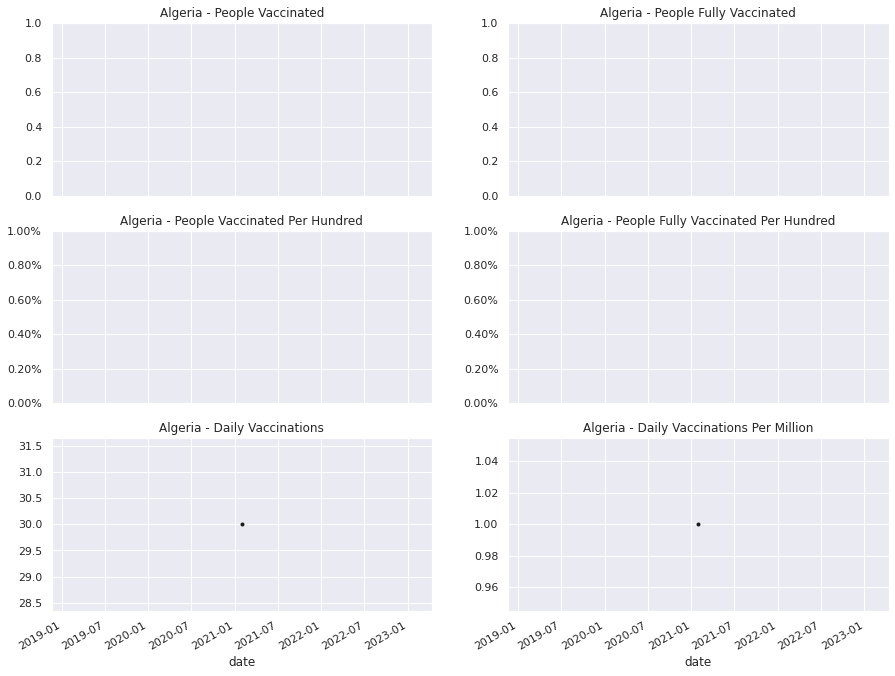

# Argentina

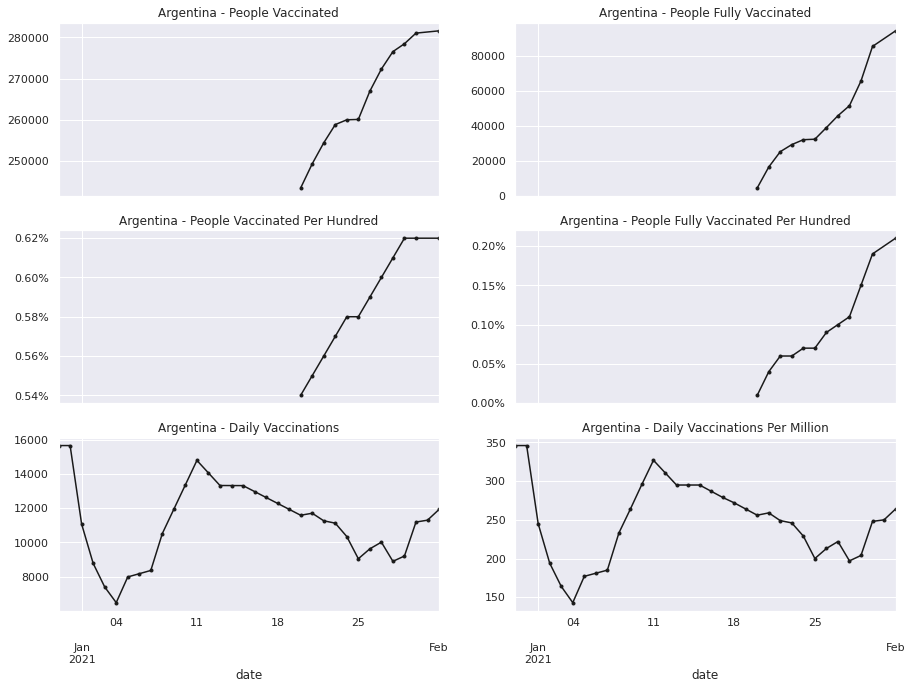

# Austria

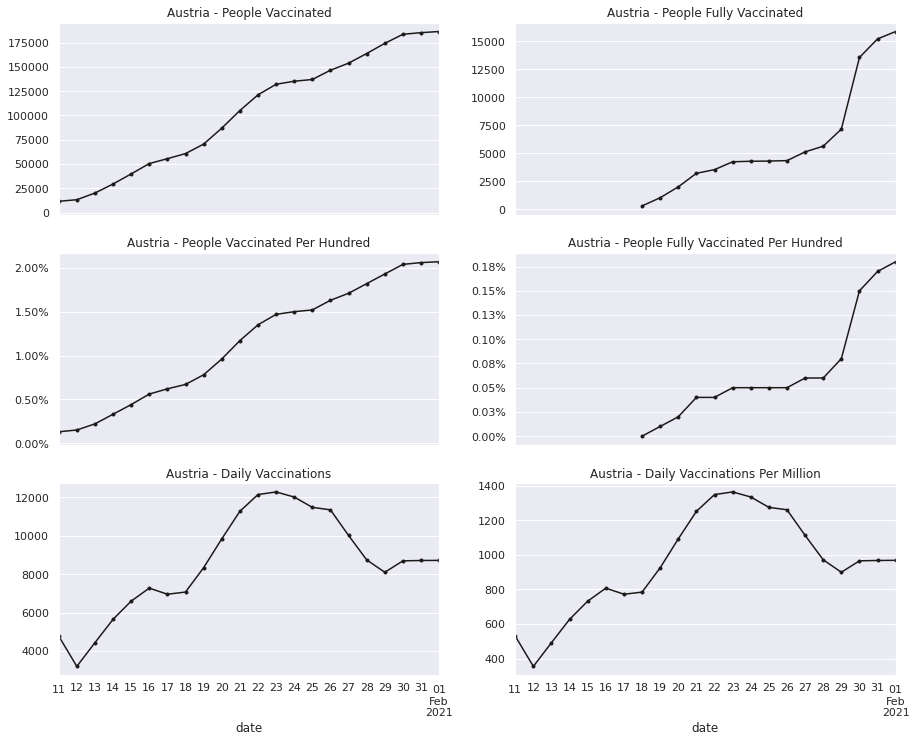

# Bahrain

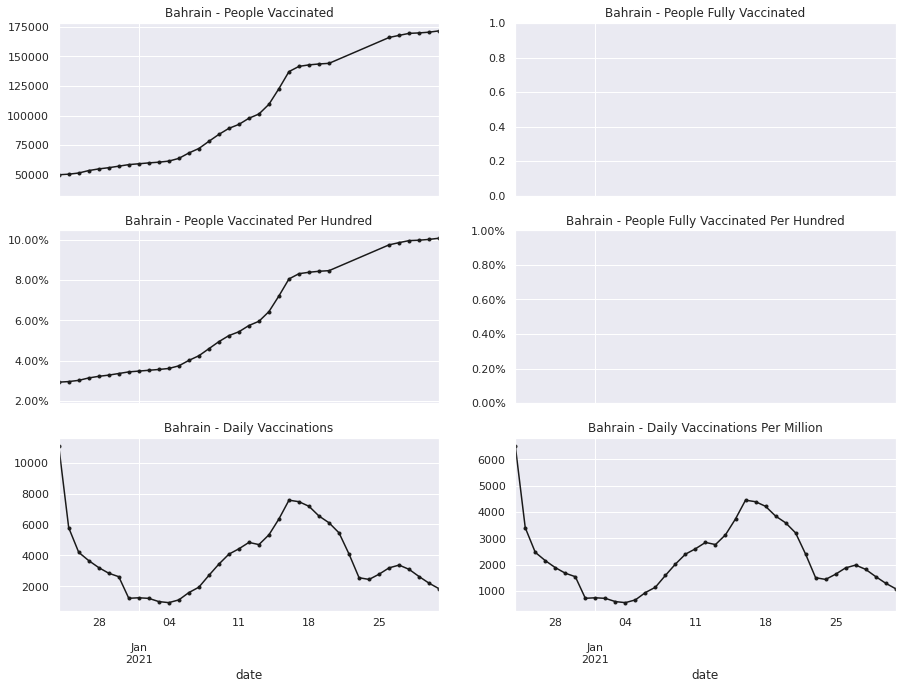

# Belgium

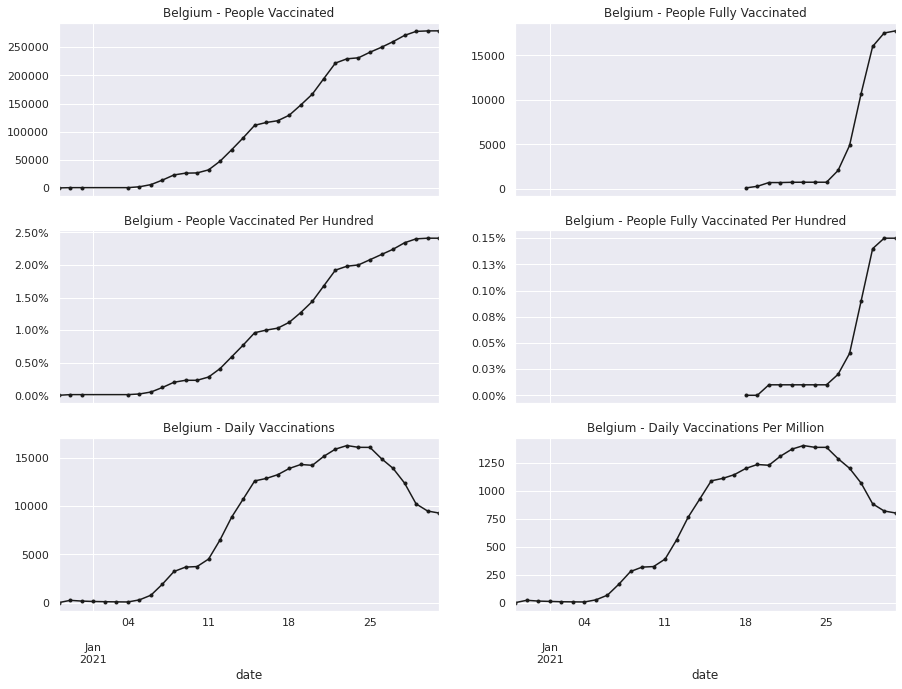

# Bermuda

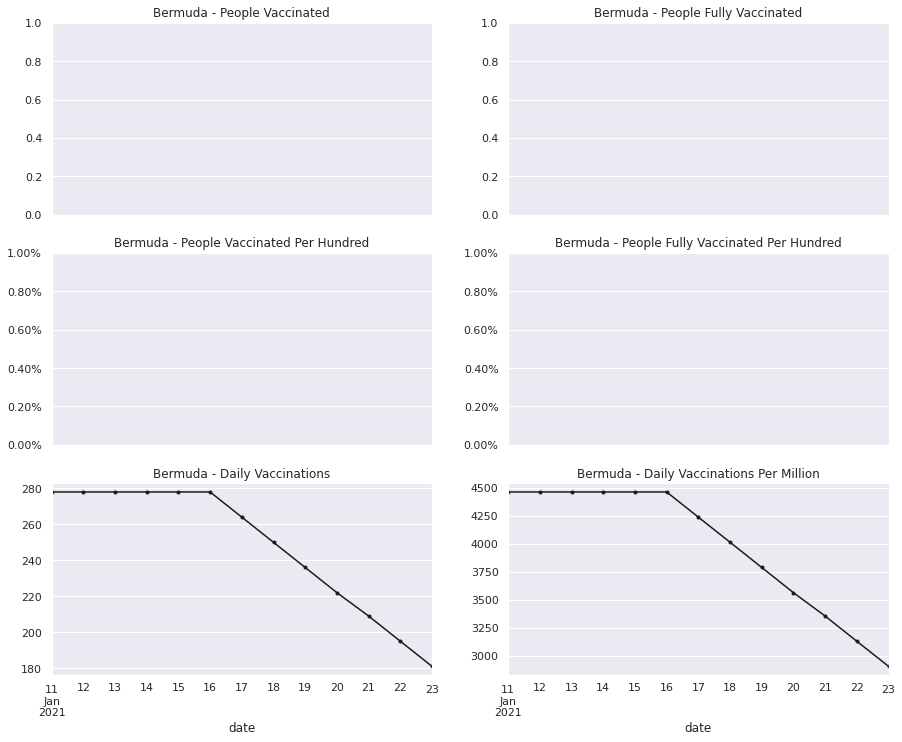

# Brazil

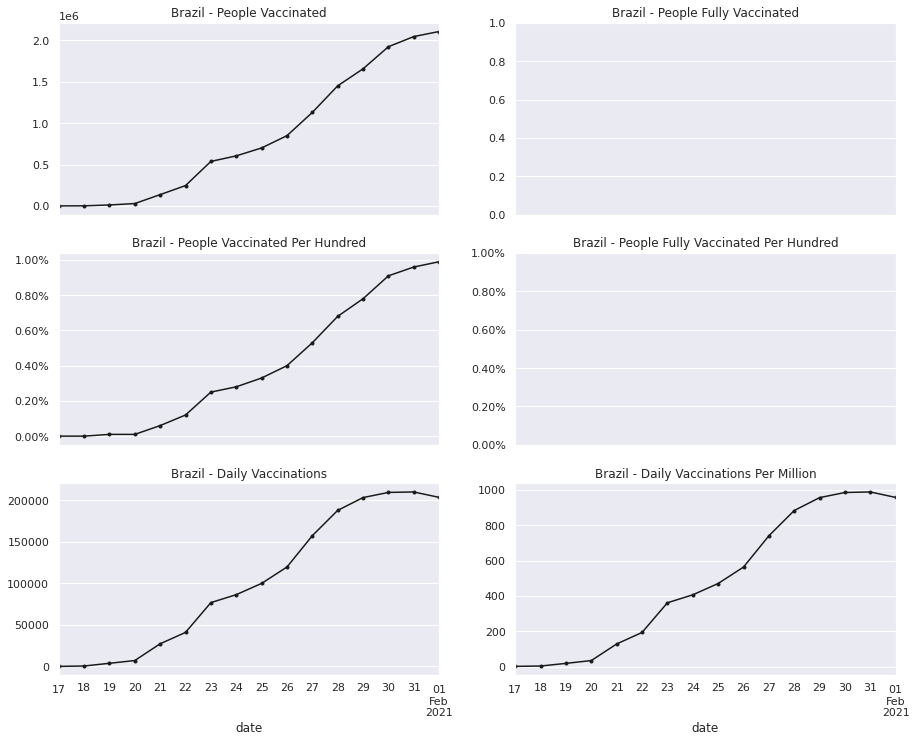

# Bulgaria

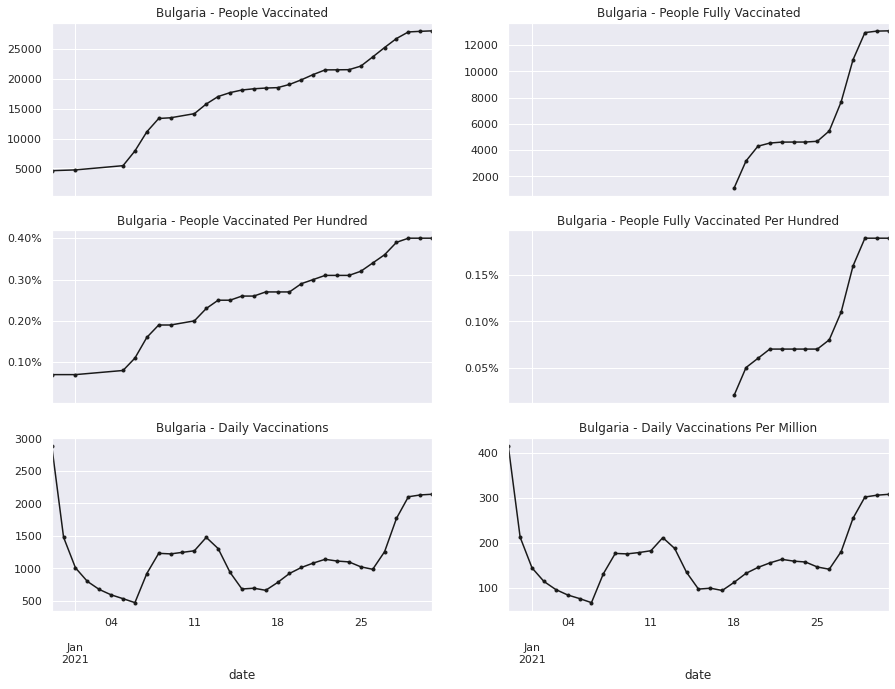

# Canada

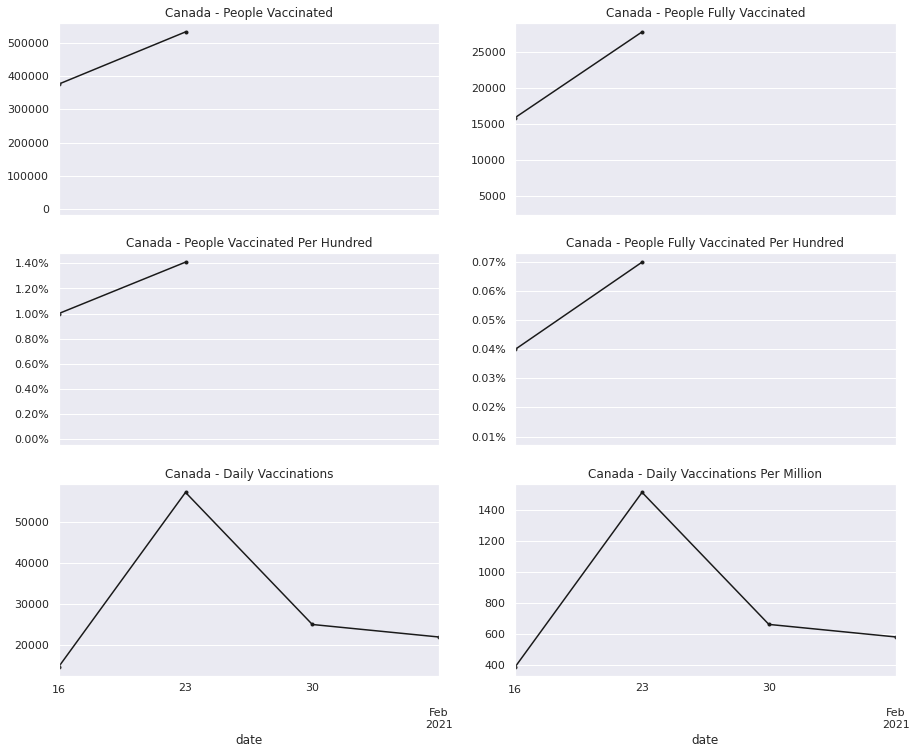

# Chile

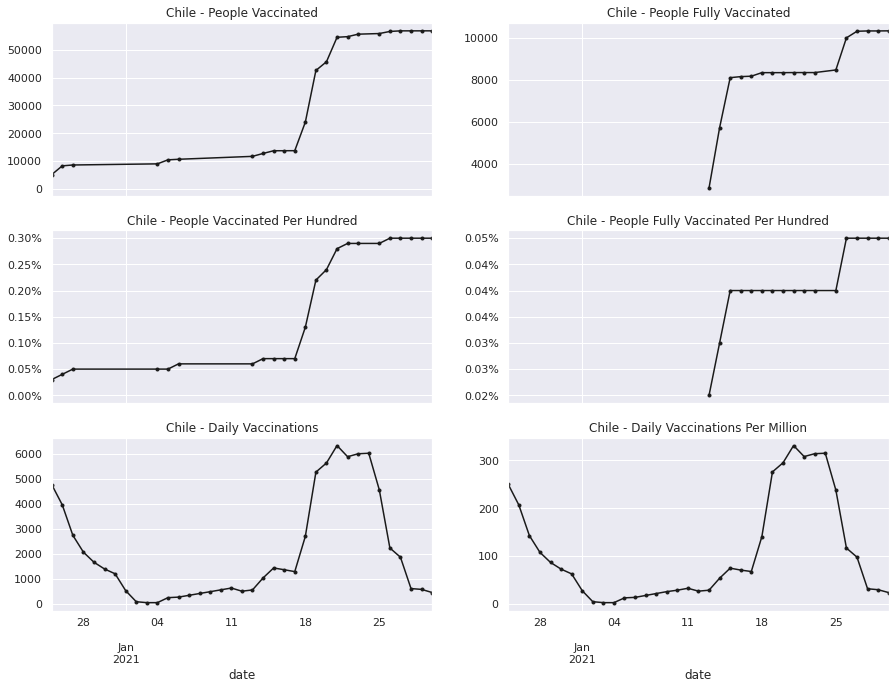

# China

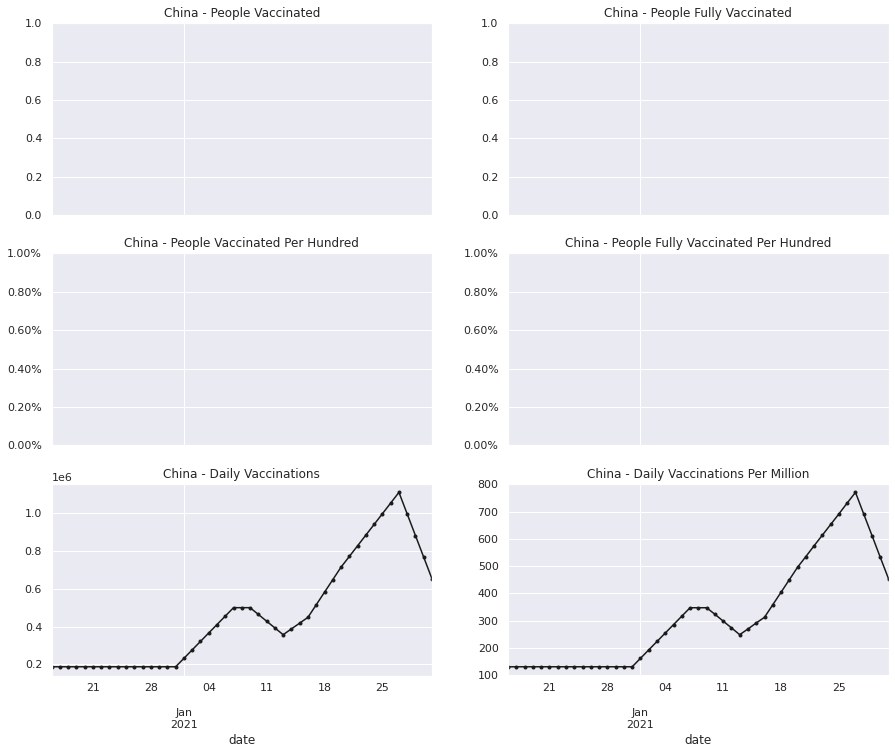

# Costa Rica

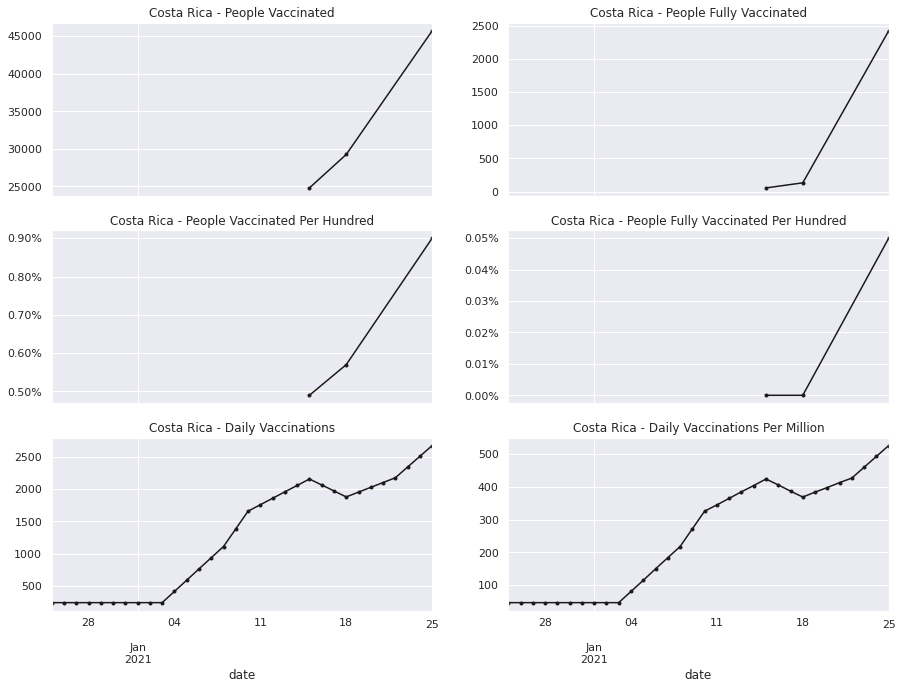

# Croatia

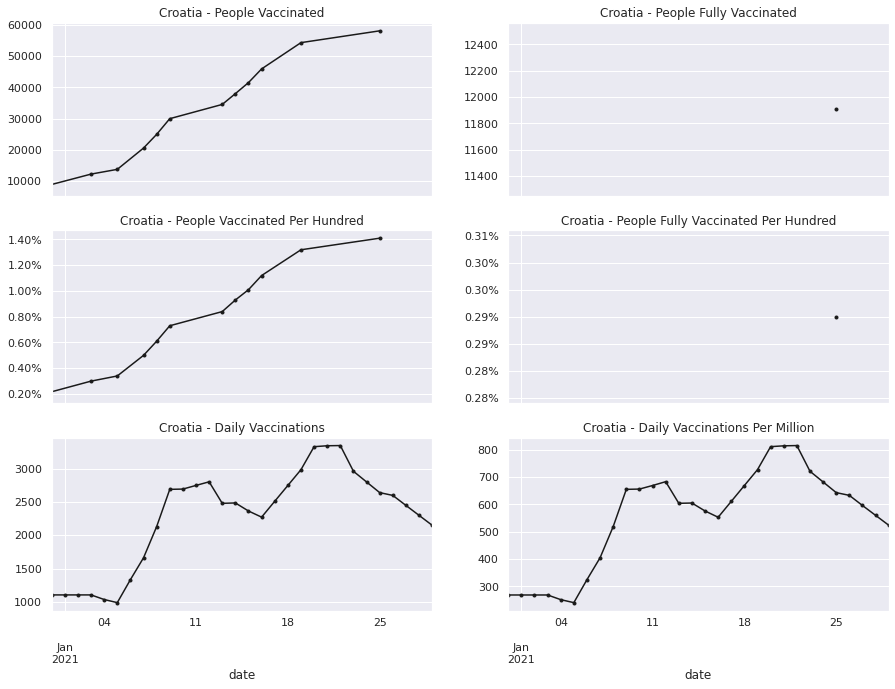

# Cyprus

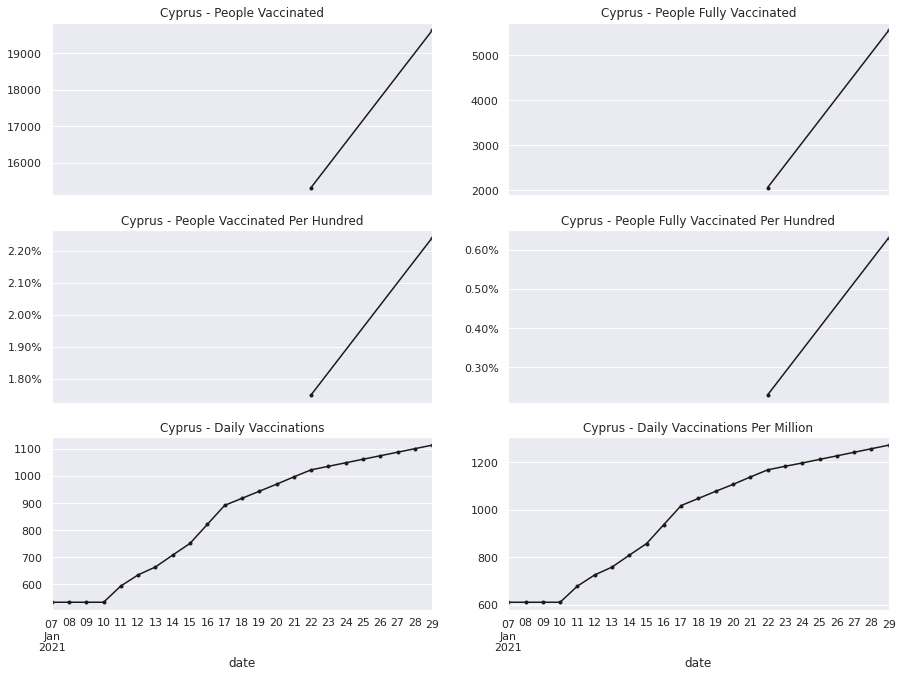

# Czechia

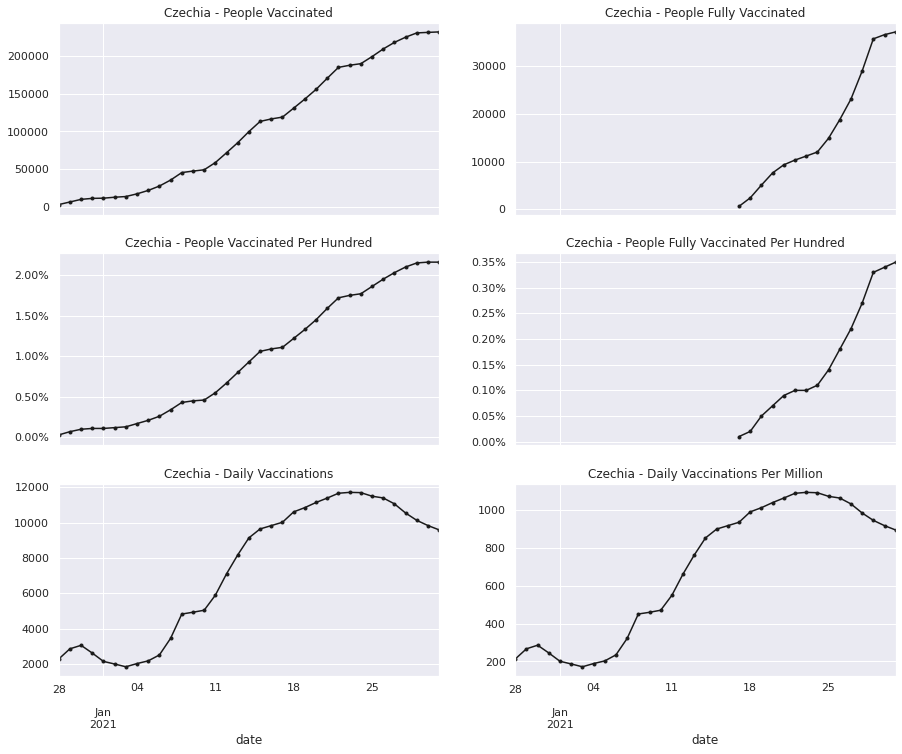

# Denmark

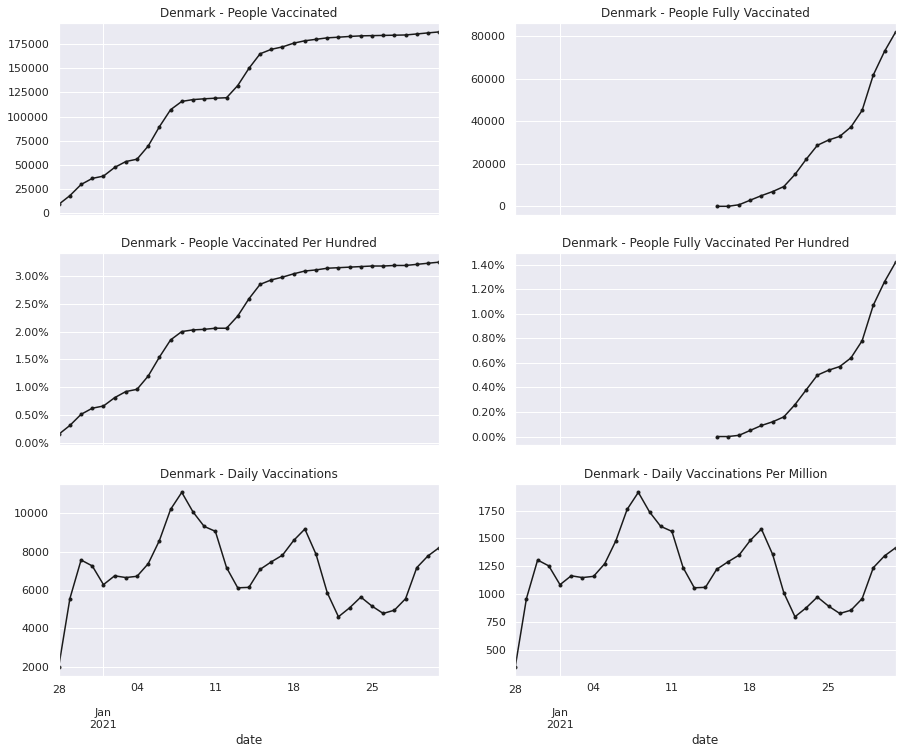

# Ecuador

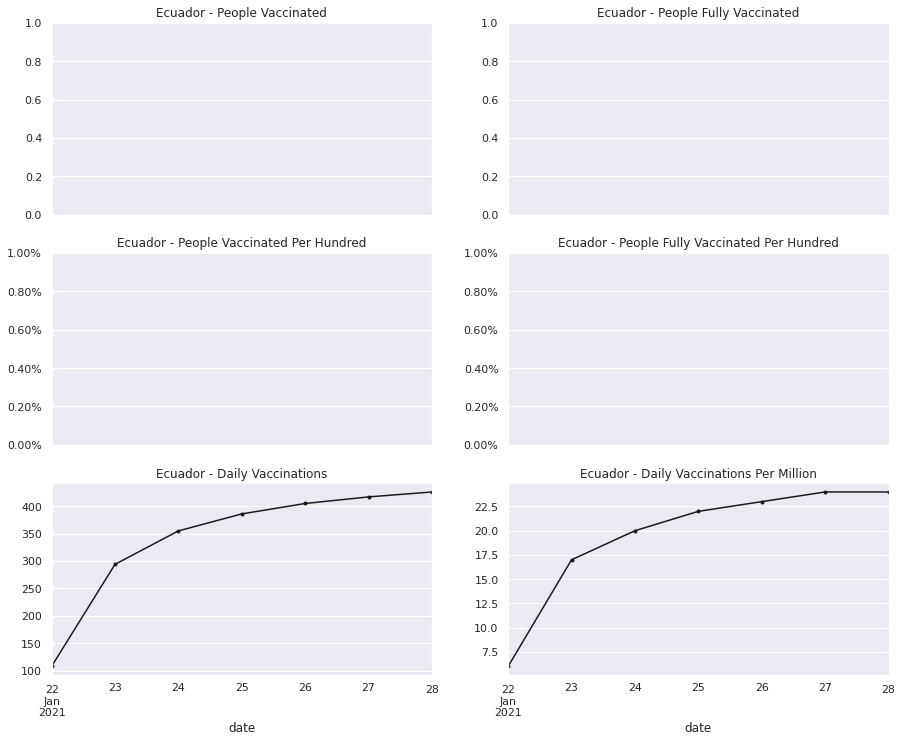

# England

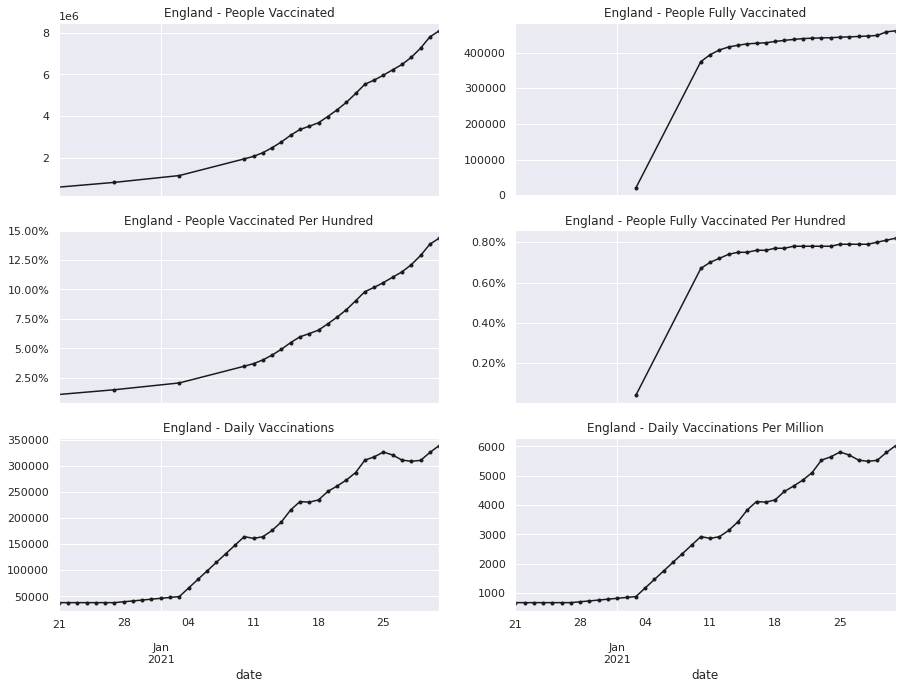

# Estonia

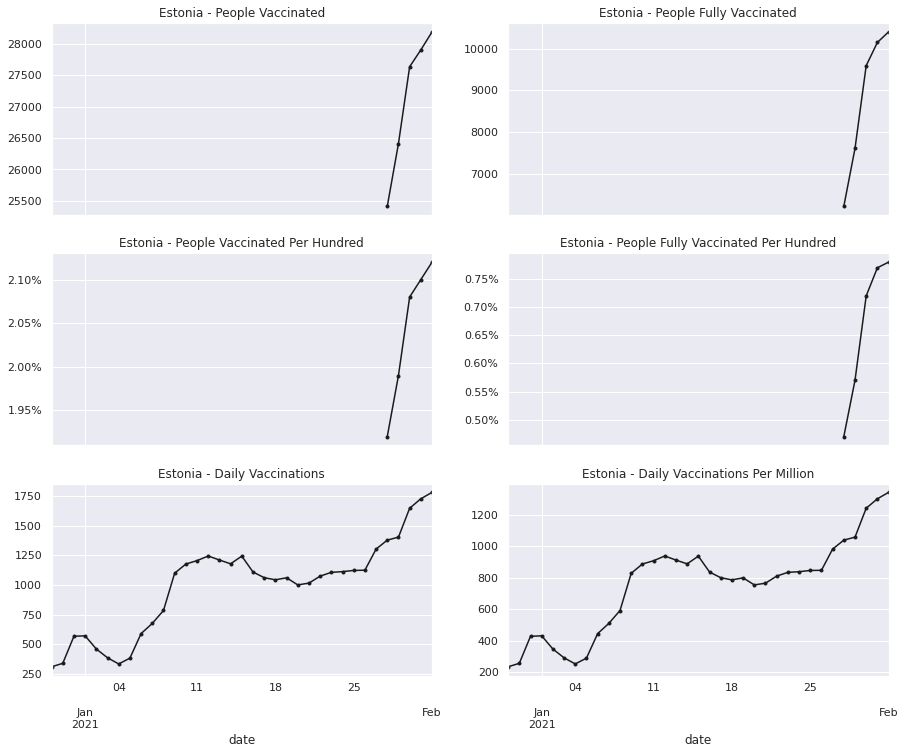

# European Union

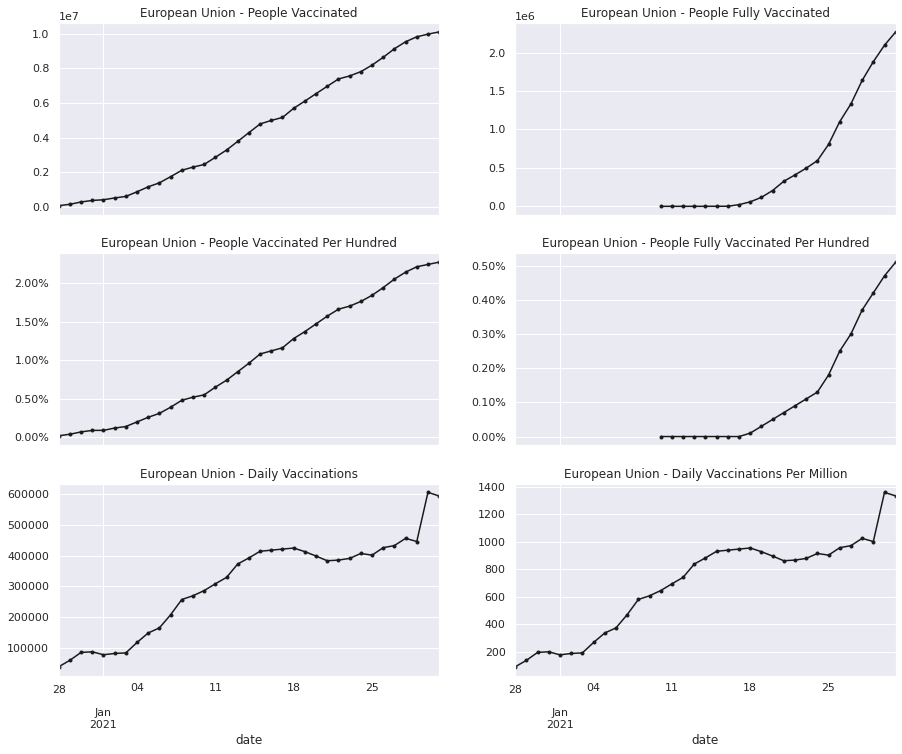

# Finland

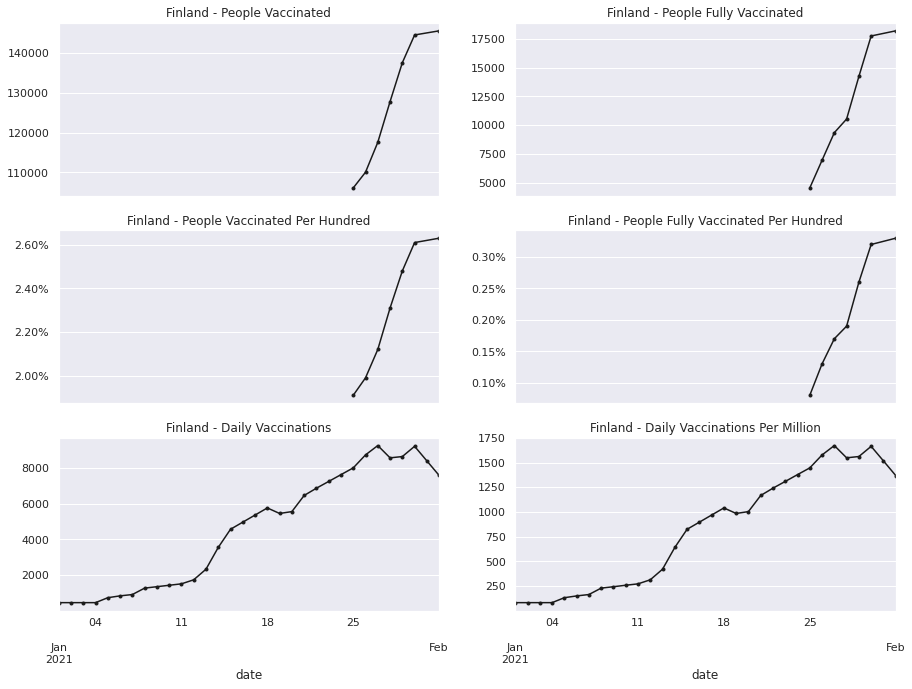

# France

/root/anaconda3/envs/covid_cartopy/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 18657.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/root/anaconda3/envs/covid_cartopy/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 18657.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


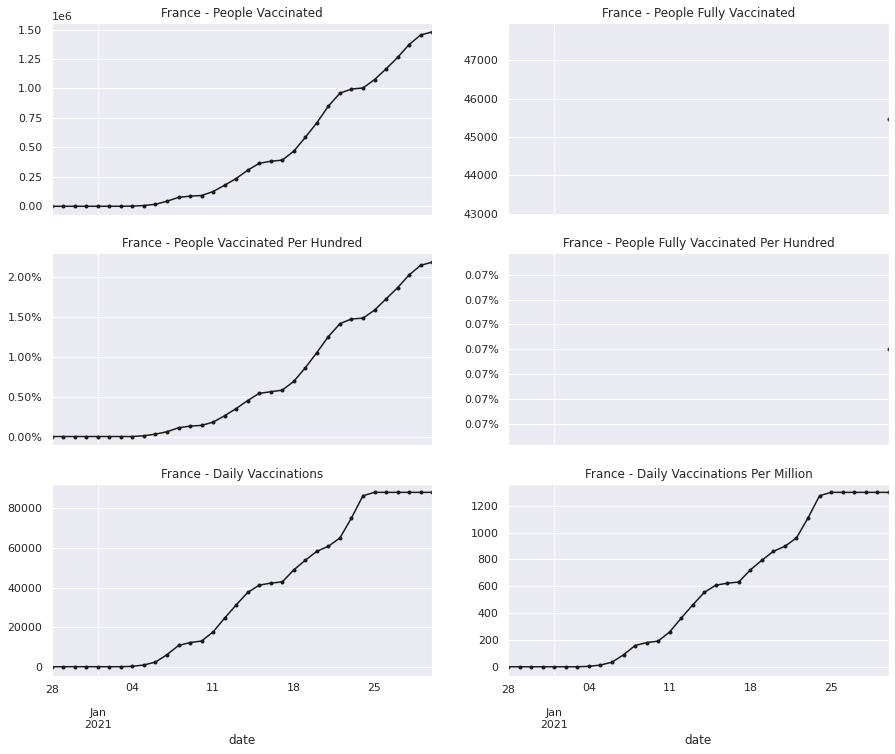

# Germany

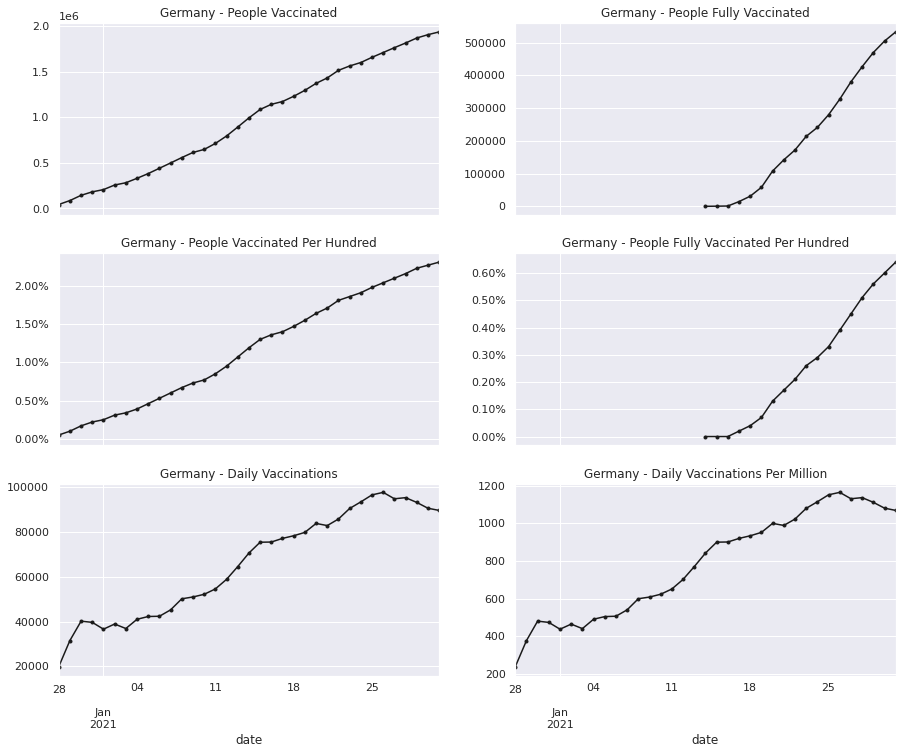

# Gibraltar

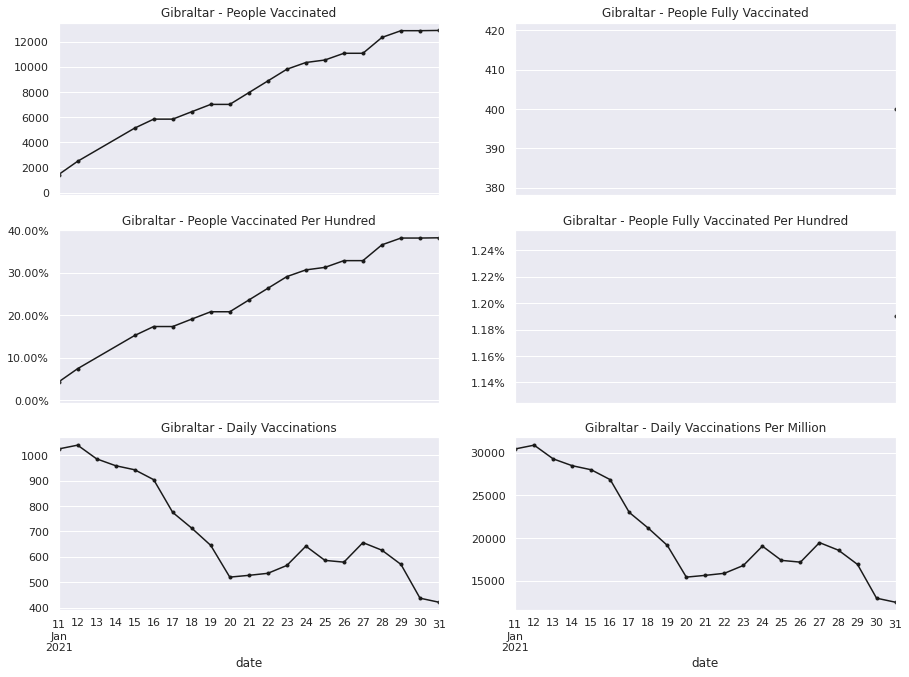

# Greece

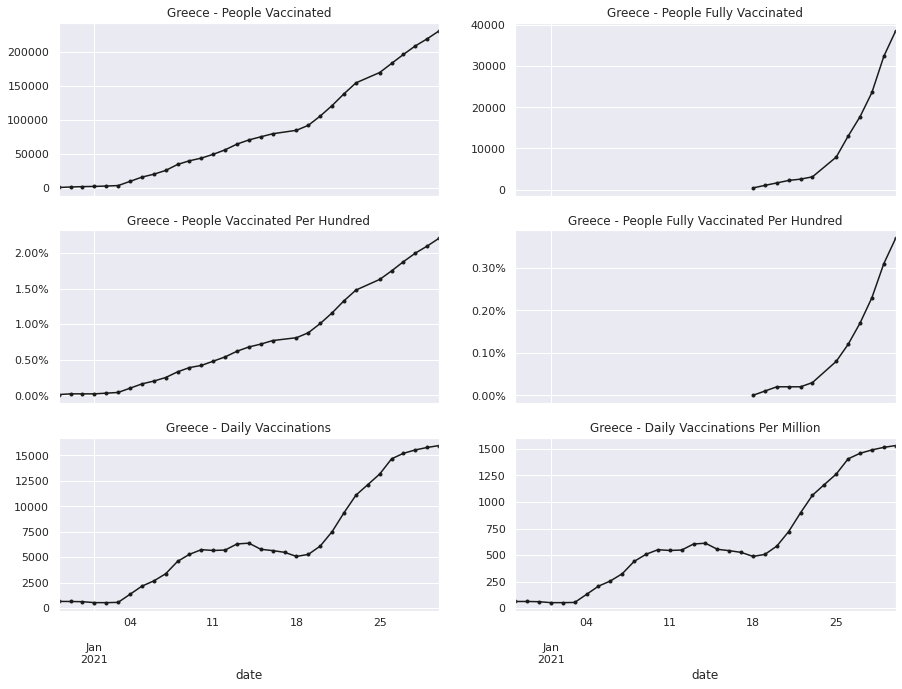

# Hungary

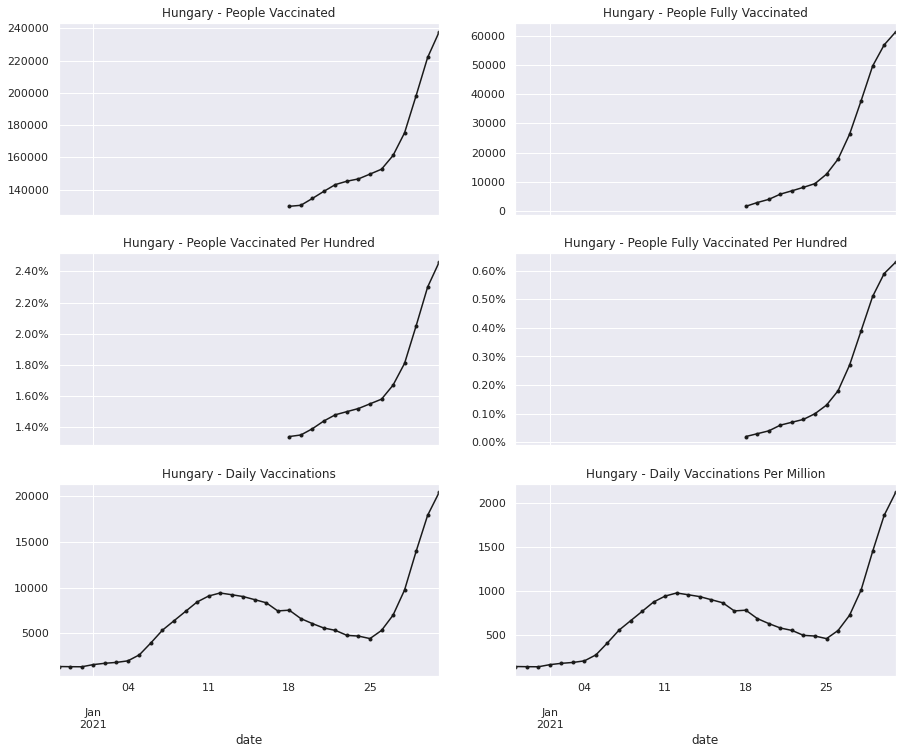

# Iceland

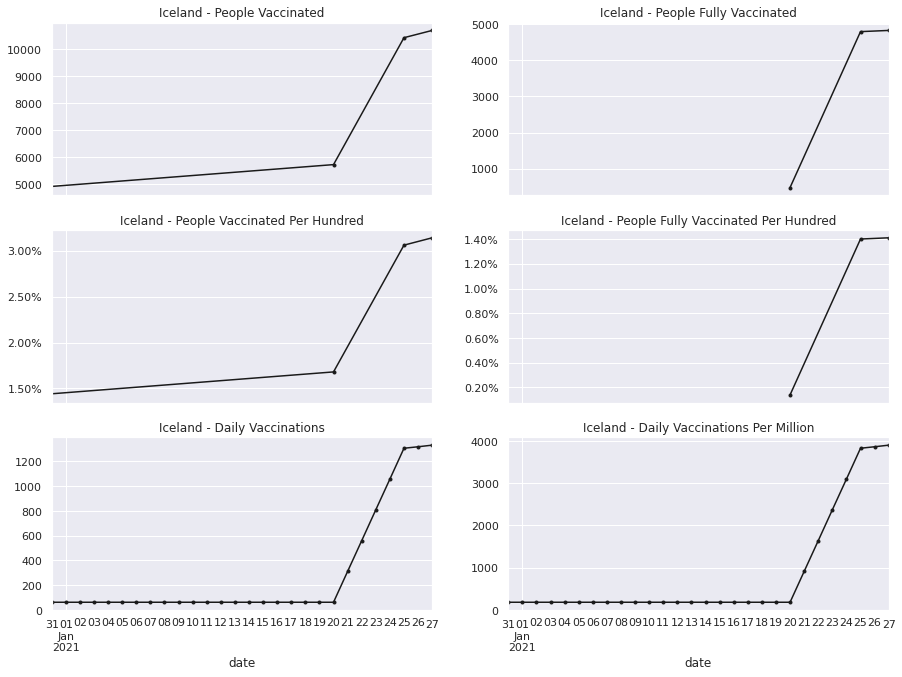

# India

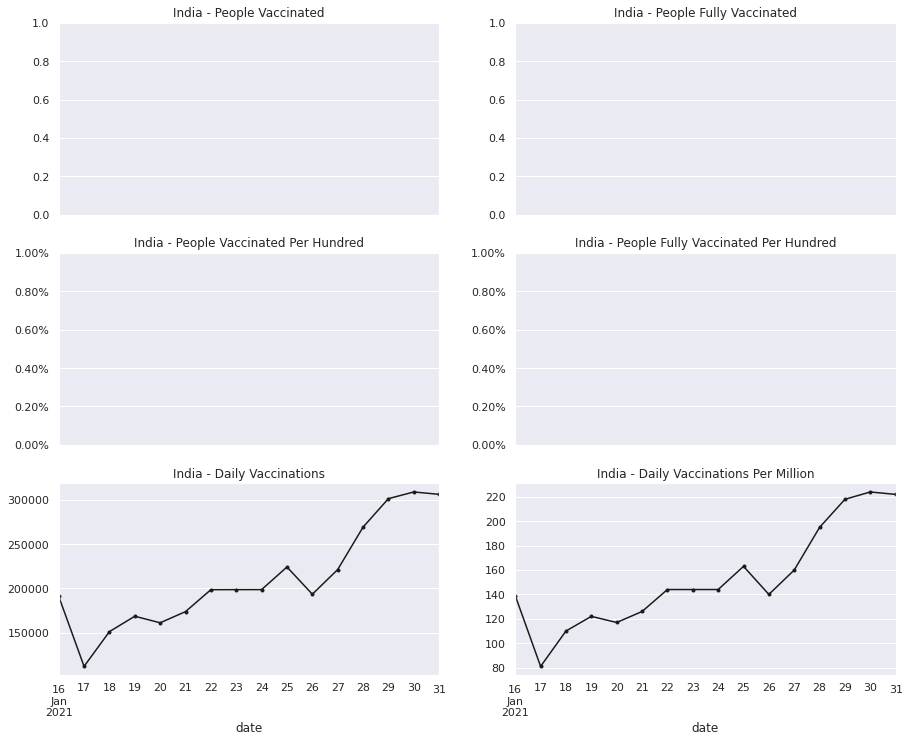

# Indonesia

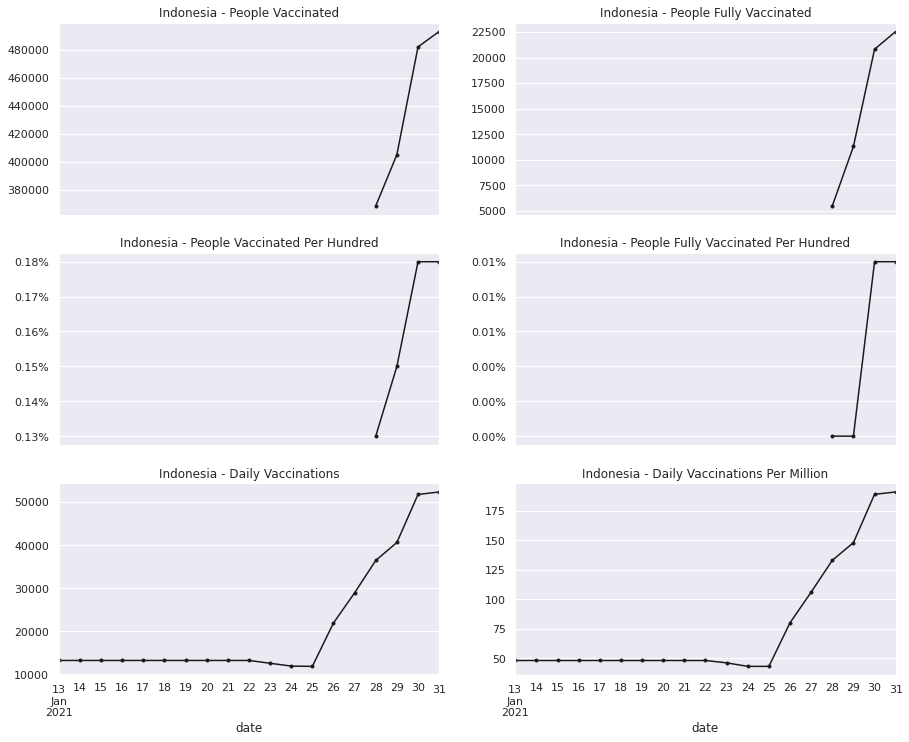

# Ireland

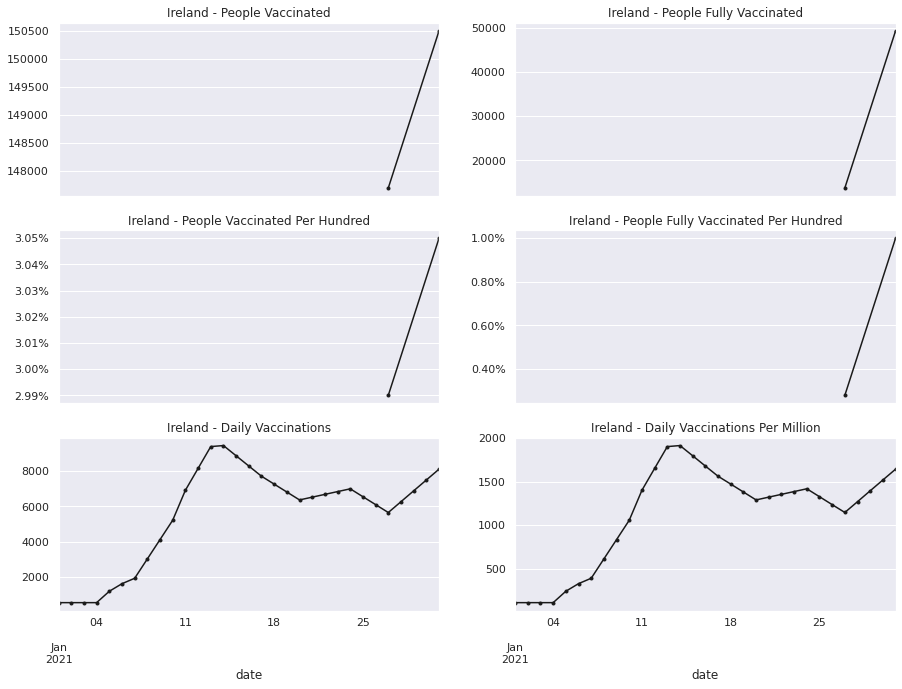

# Isle of Man

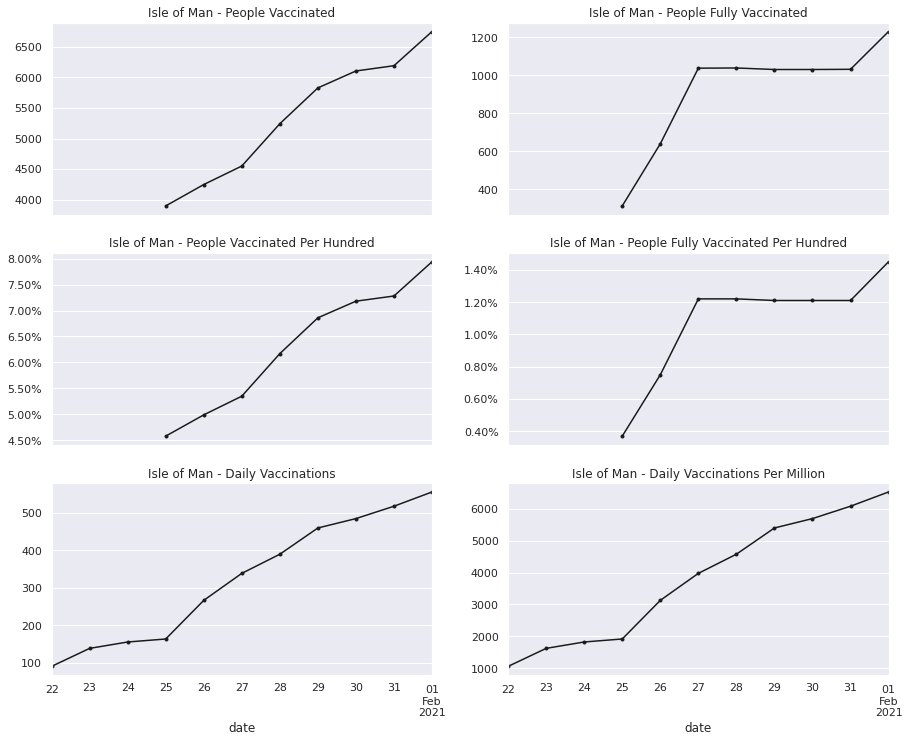

# Israel

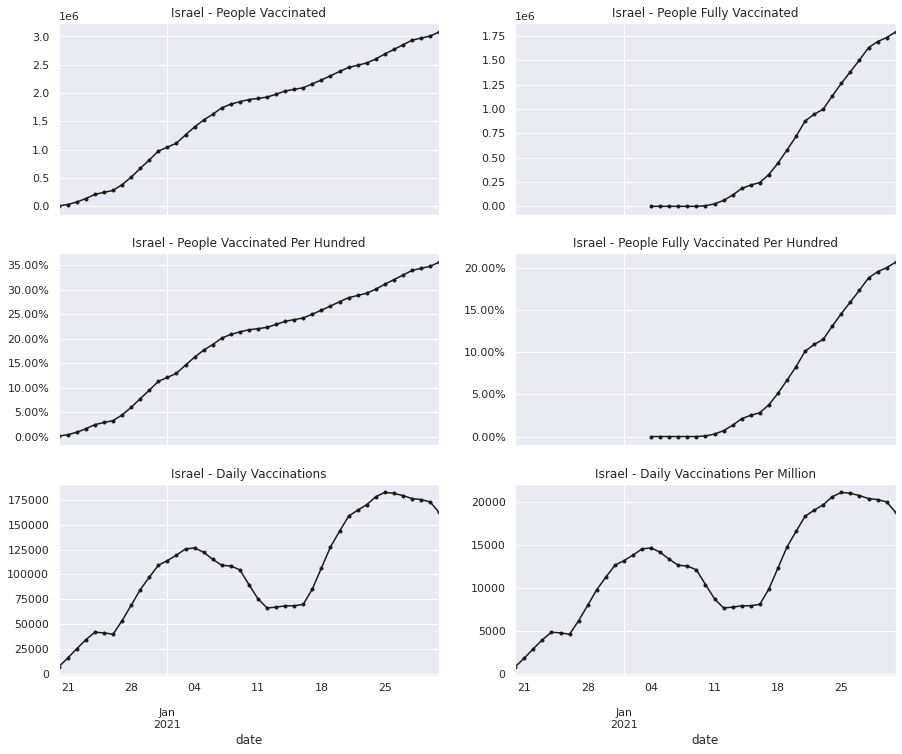

# Italy

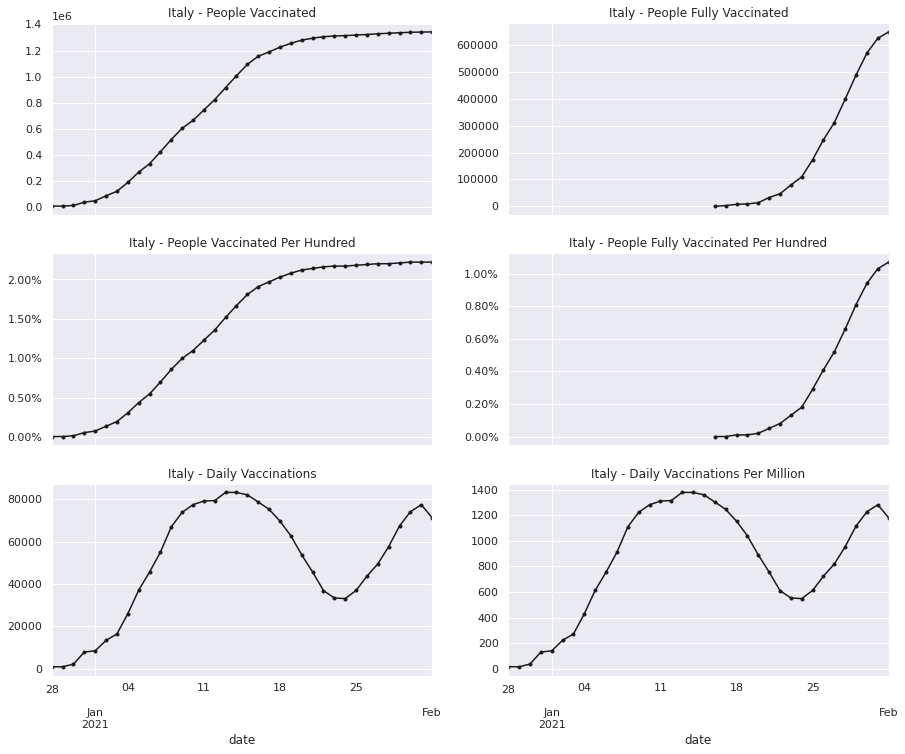

# Kuwait

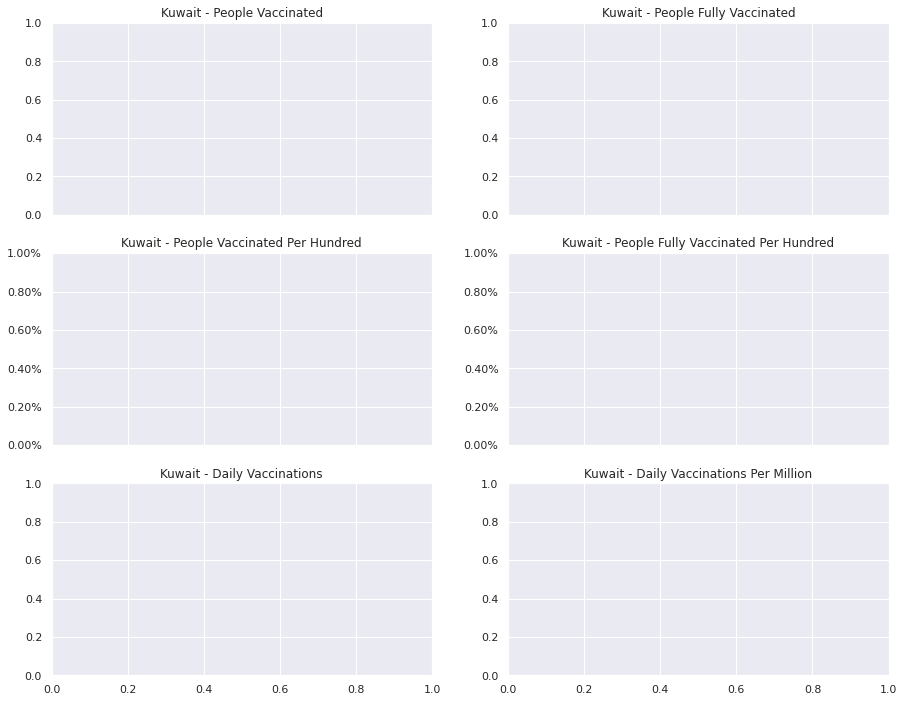

# Latvia

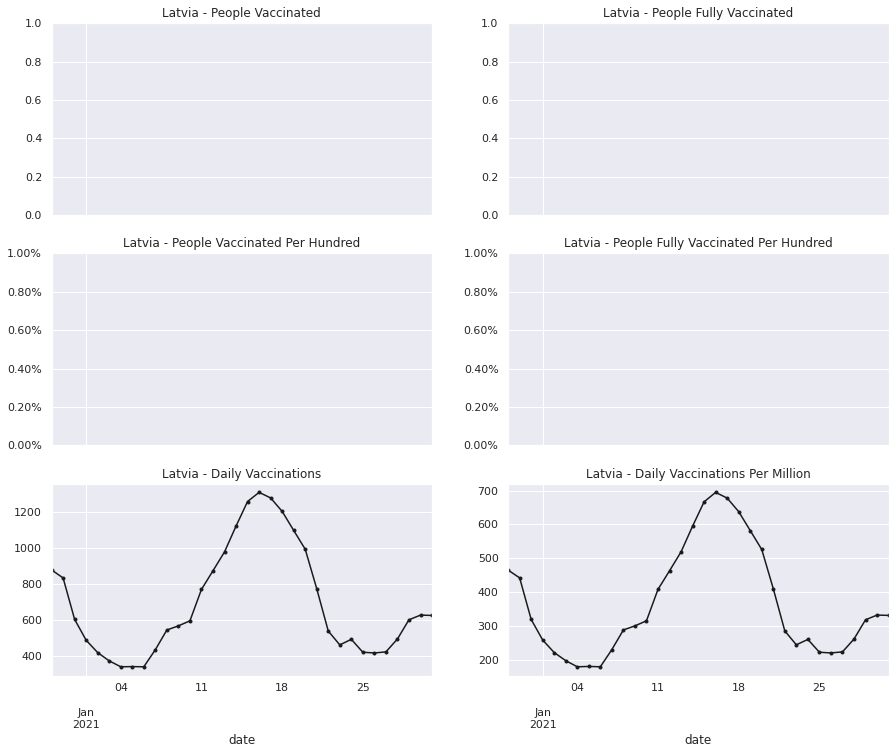

# Lithuania

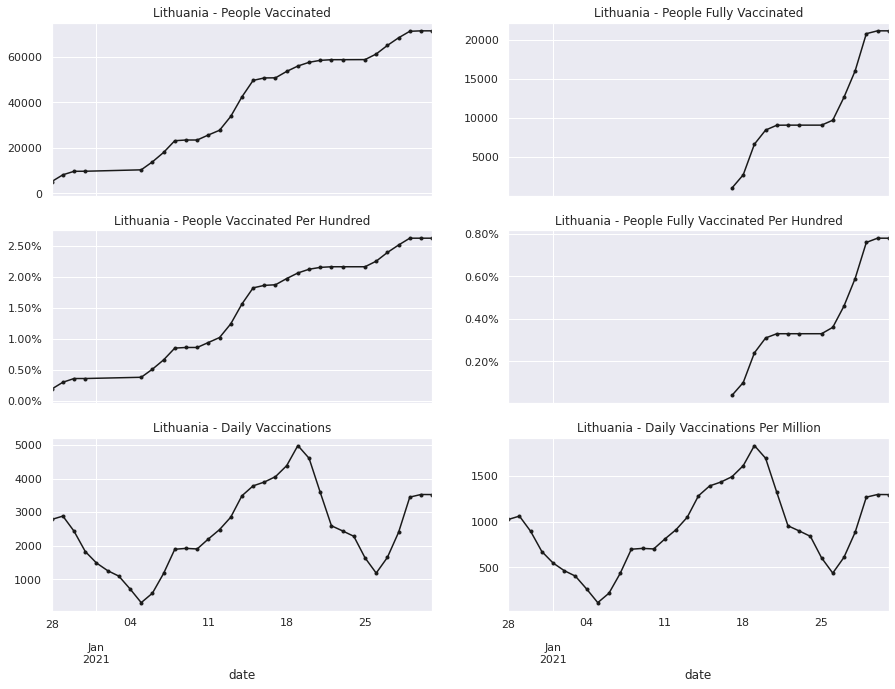

# Luxembourg

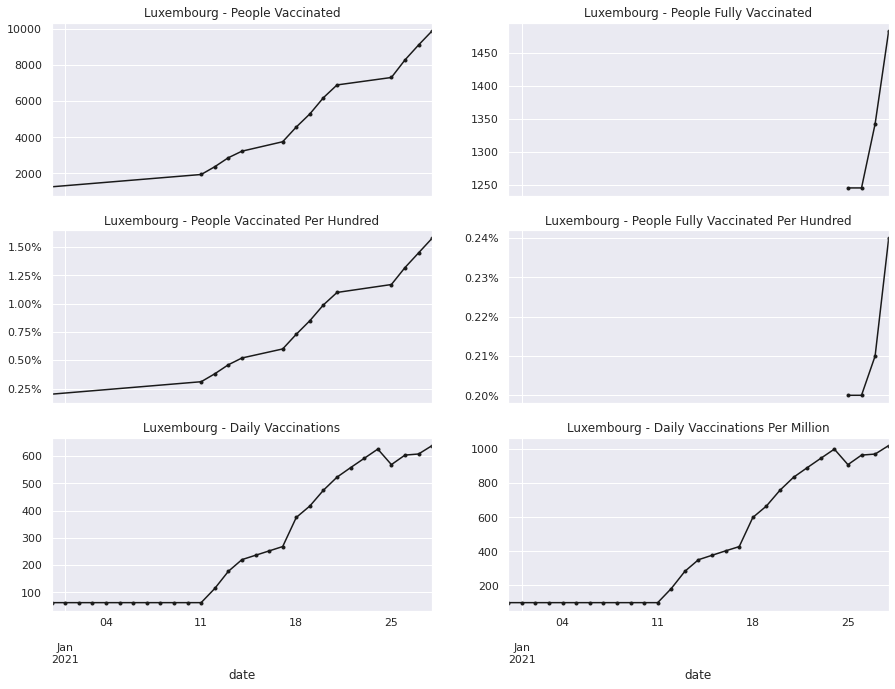

# Malta

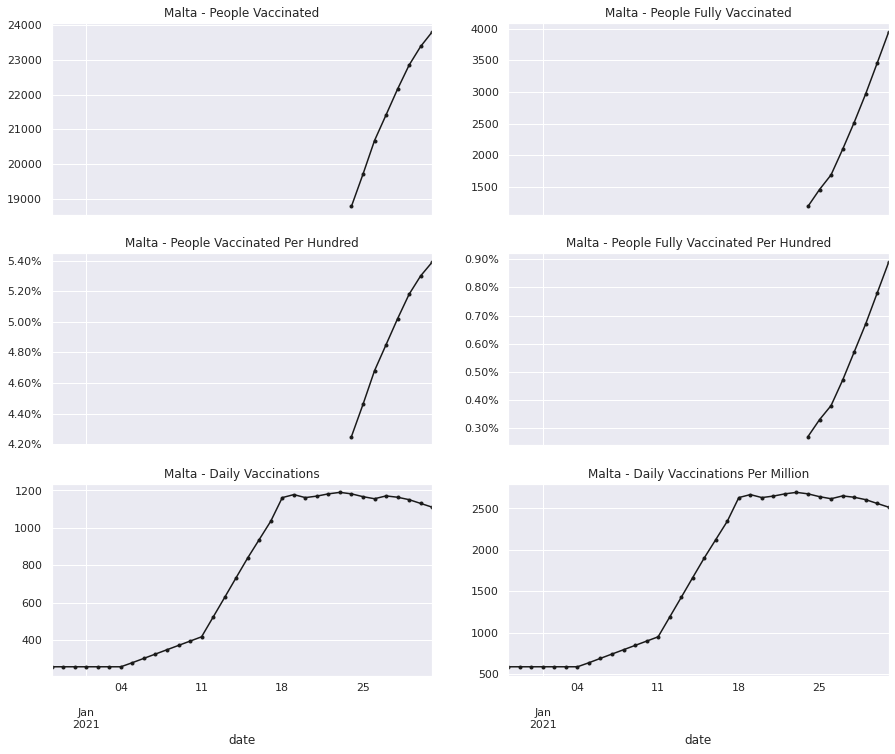

# Mexico

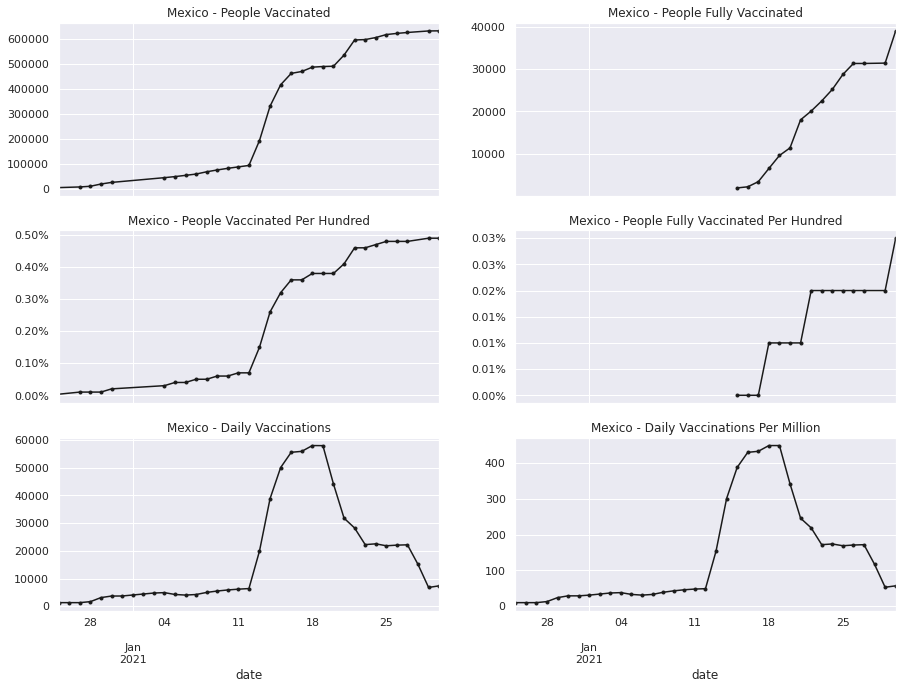

# Morocco

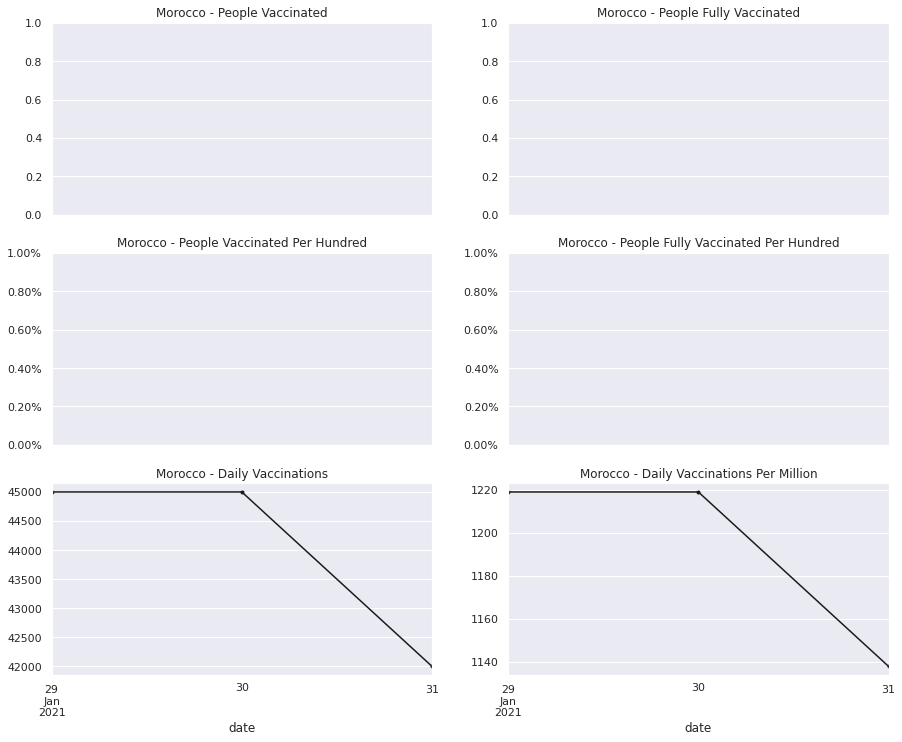

# Myanmar

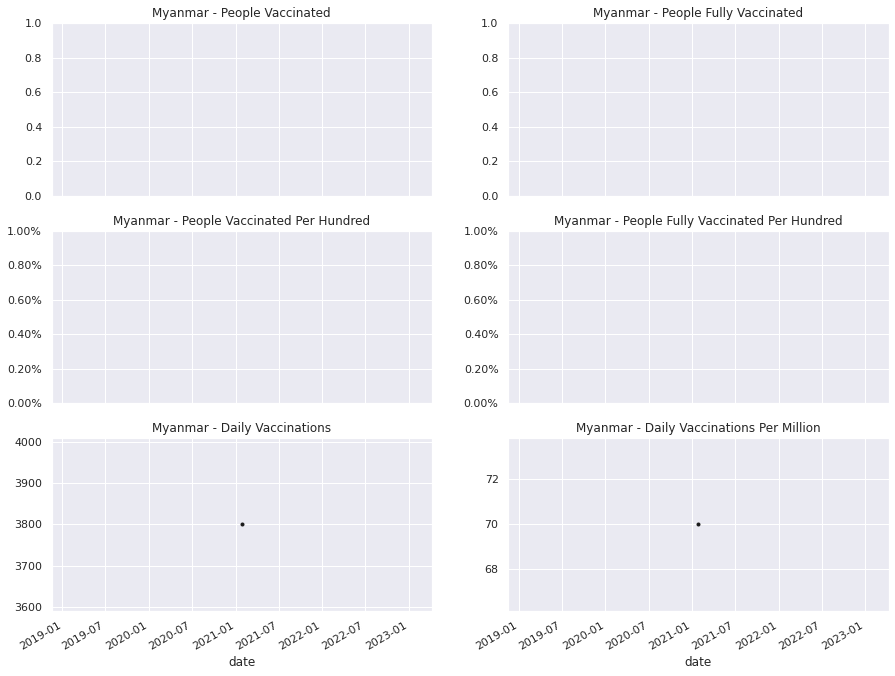

# Netherlands

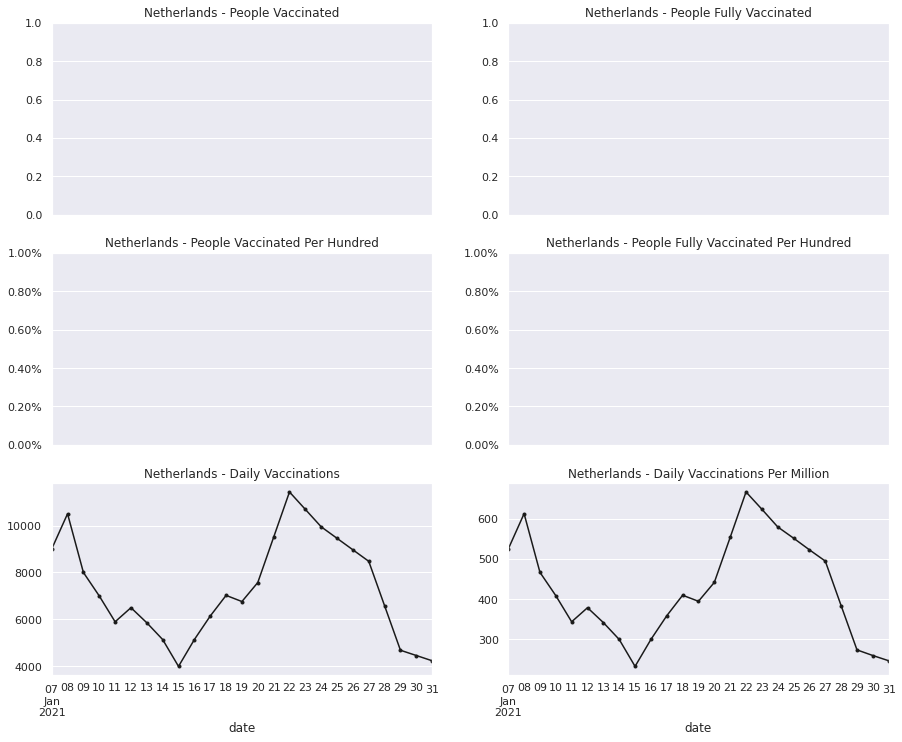

# Northern Cyprus

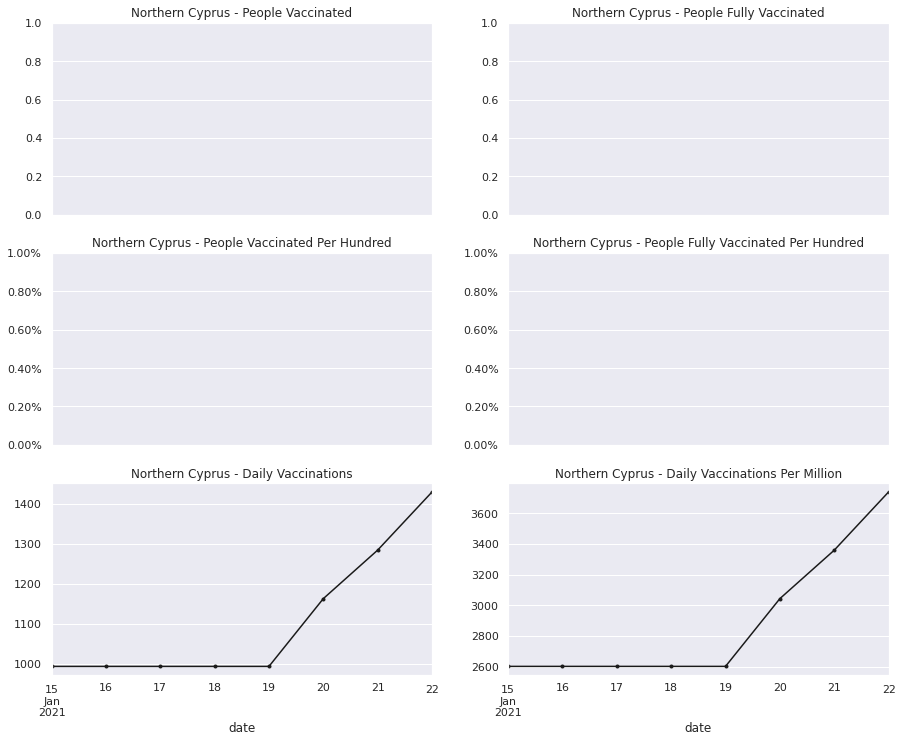

# Northern Ireland

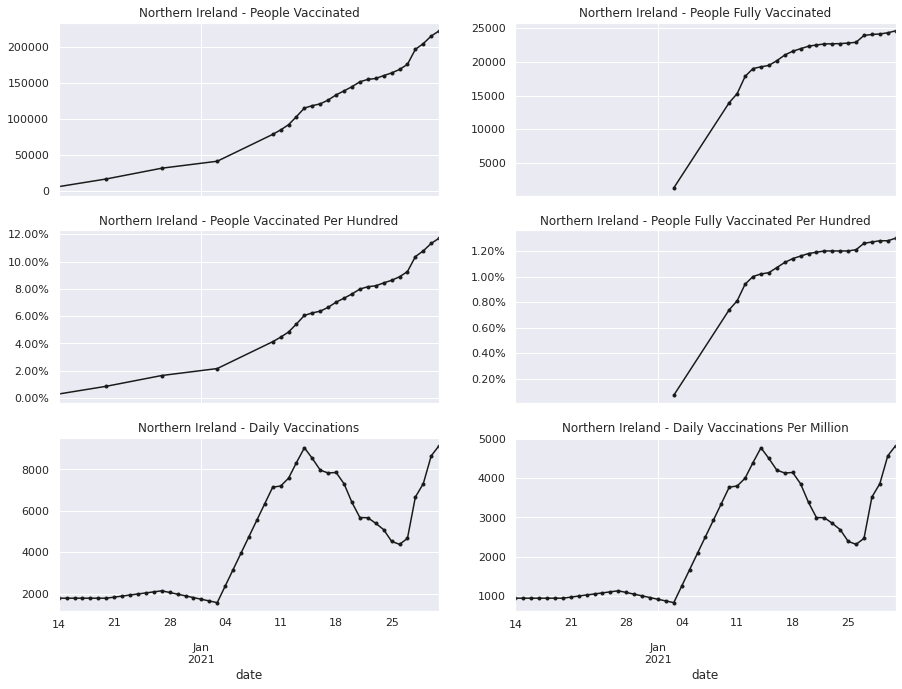

# Norway

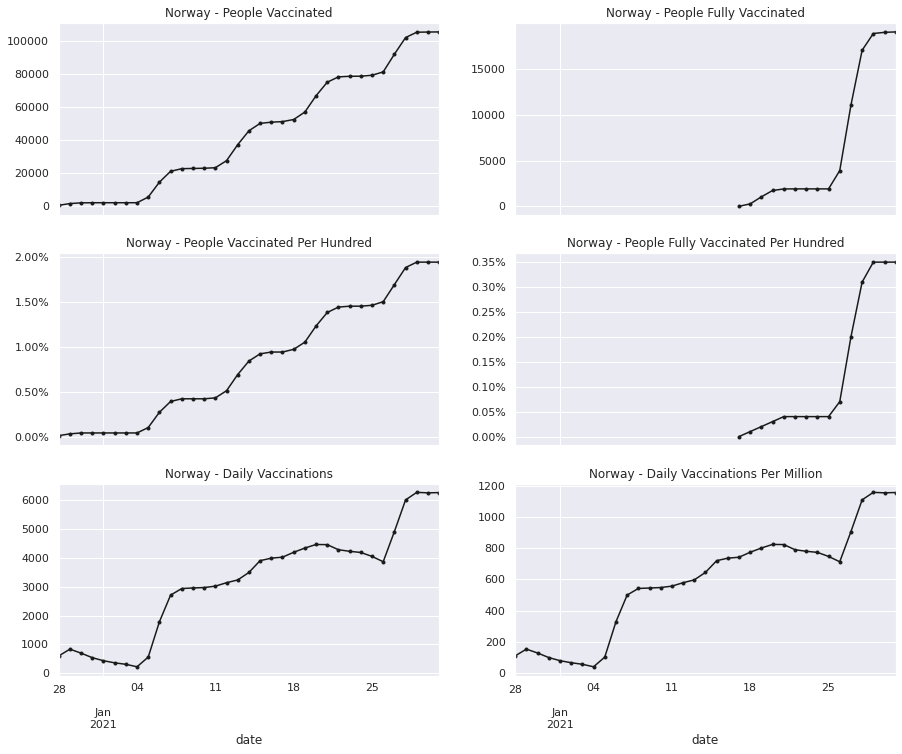

# Oman

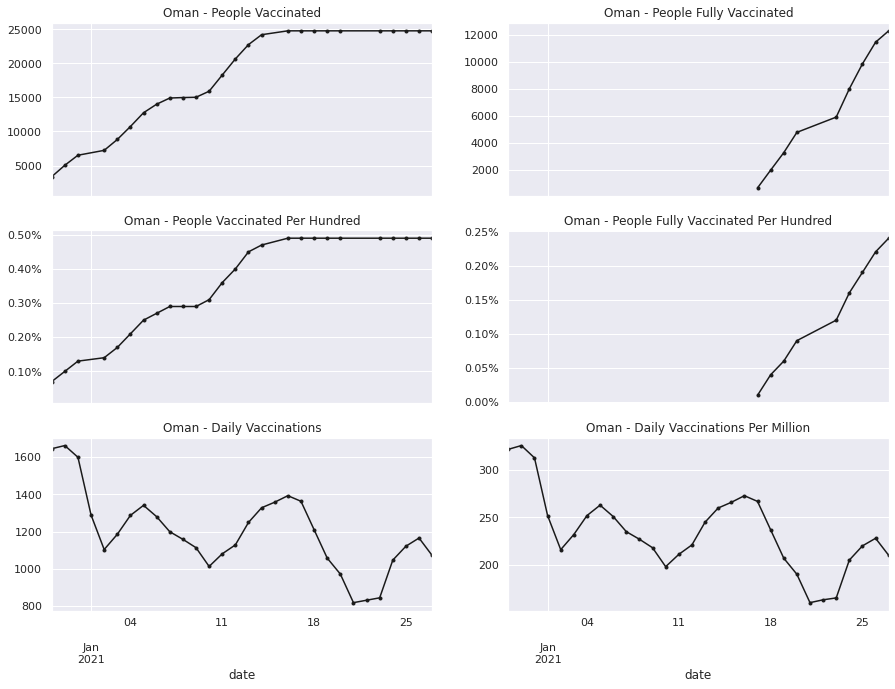

# Palau

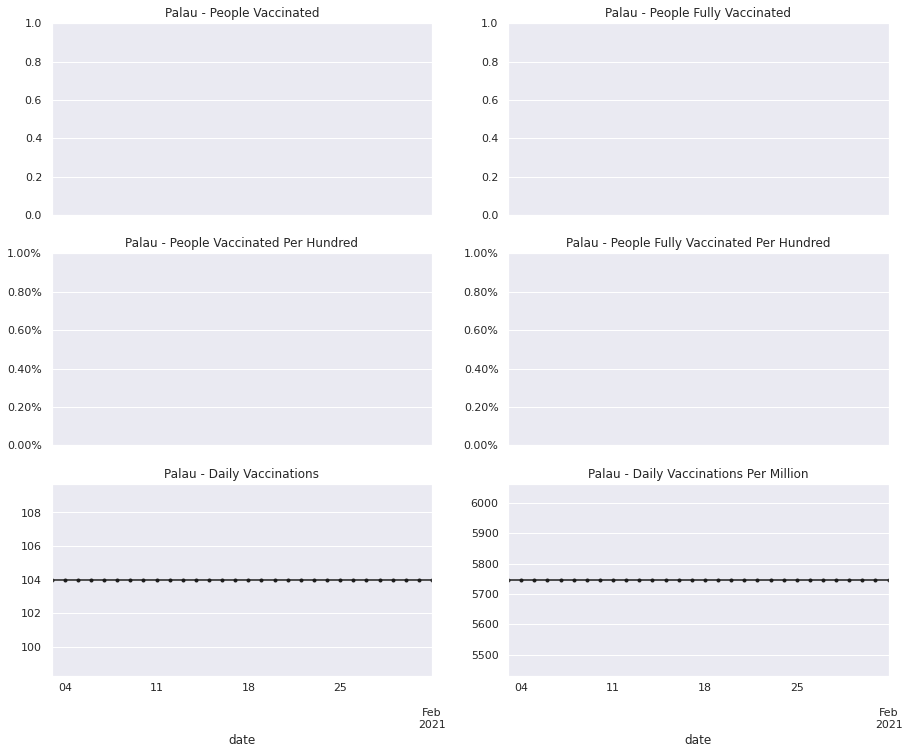

# Panama

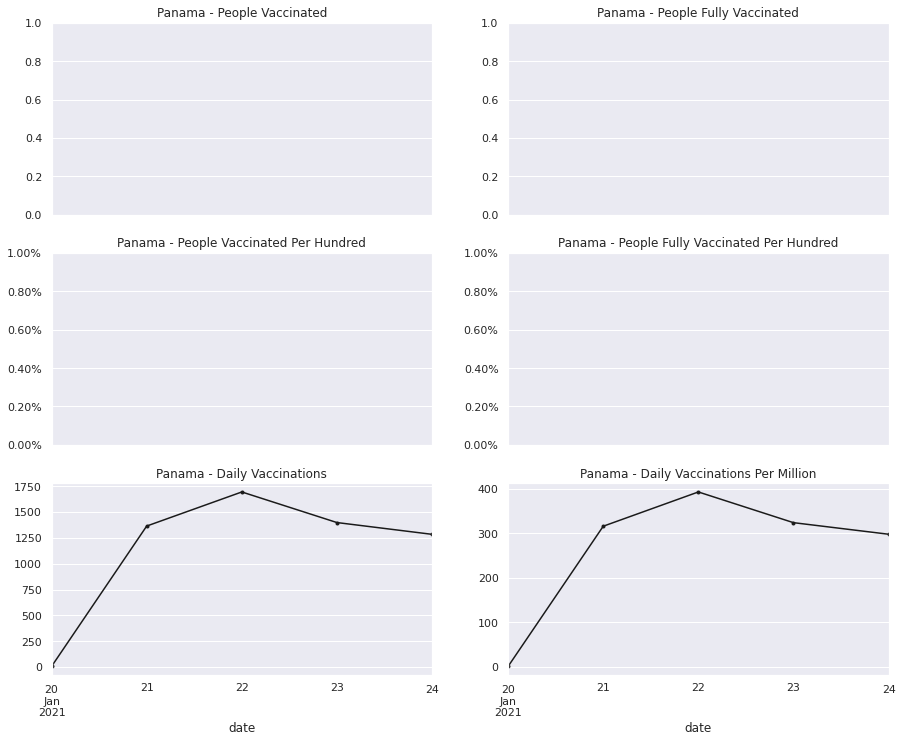

# Poland

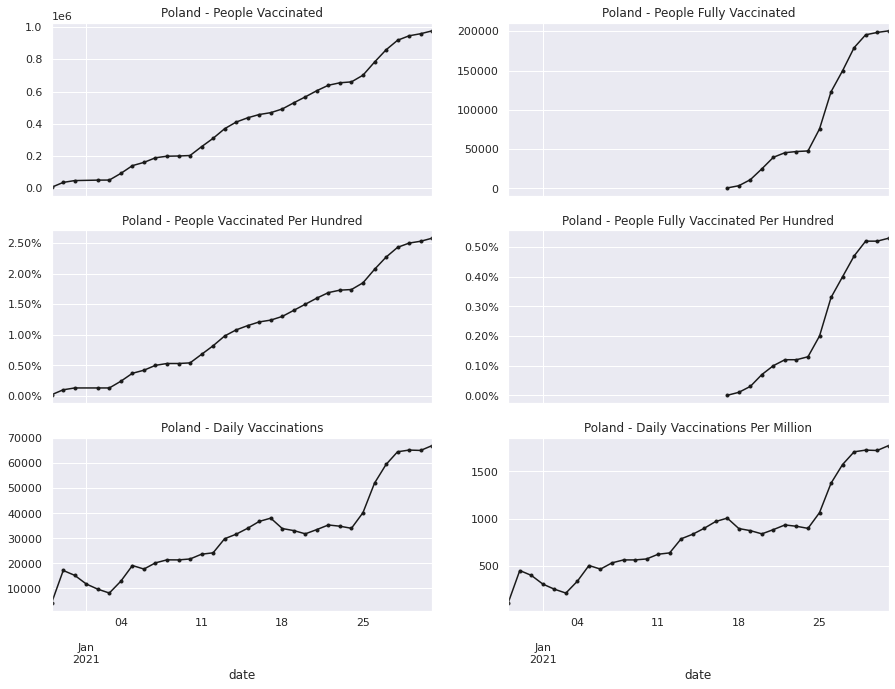

# Portugal

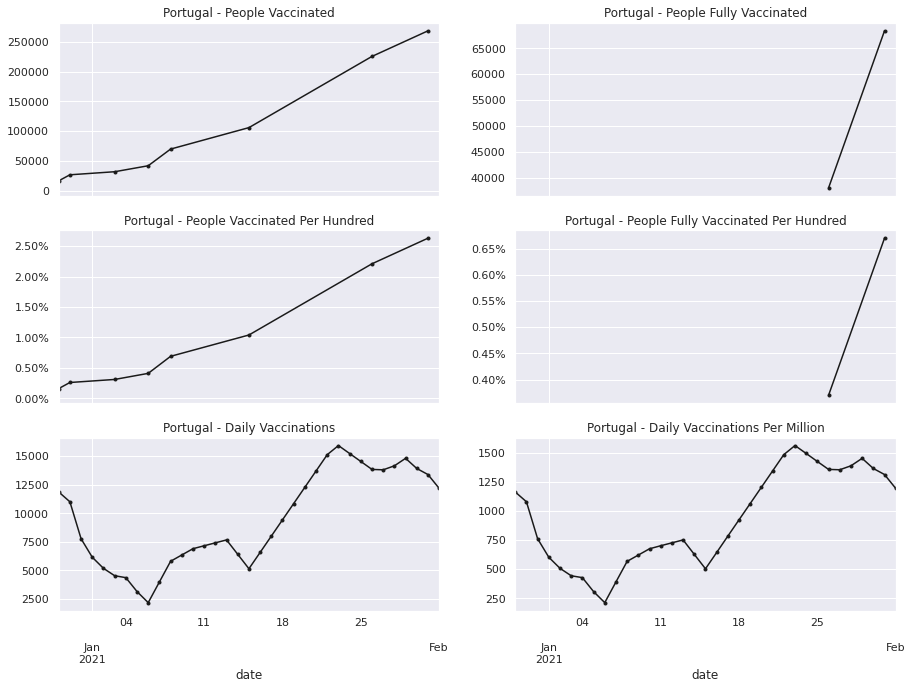

# Romania

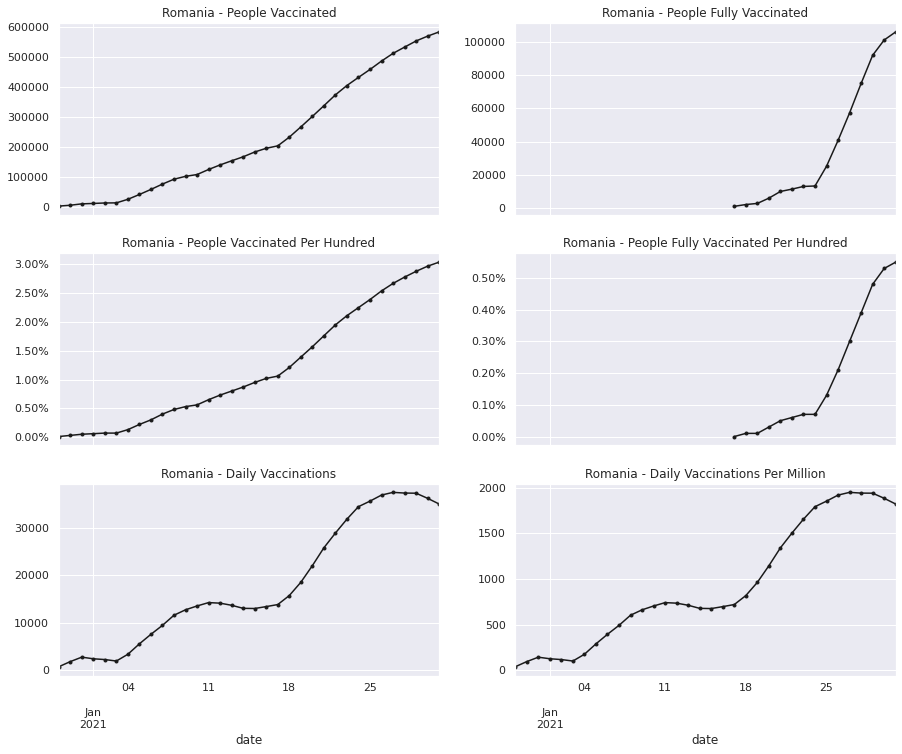

# Russia

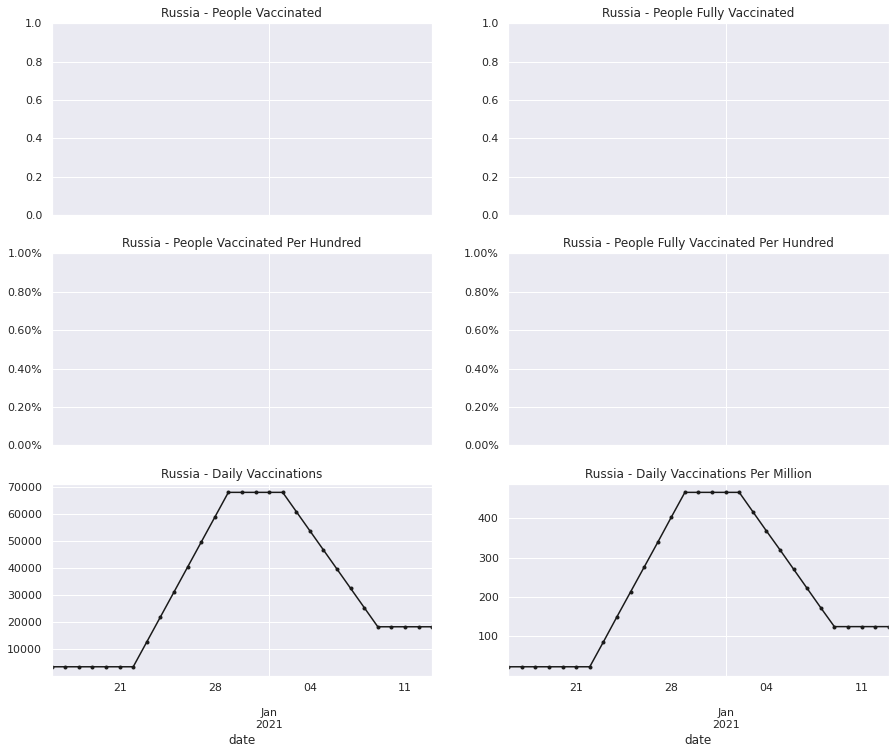

# Saudi Arabia

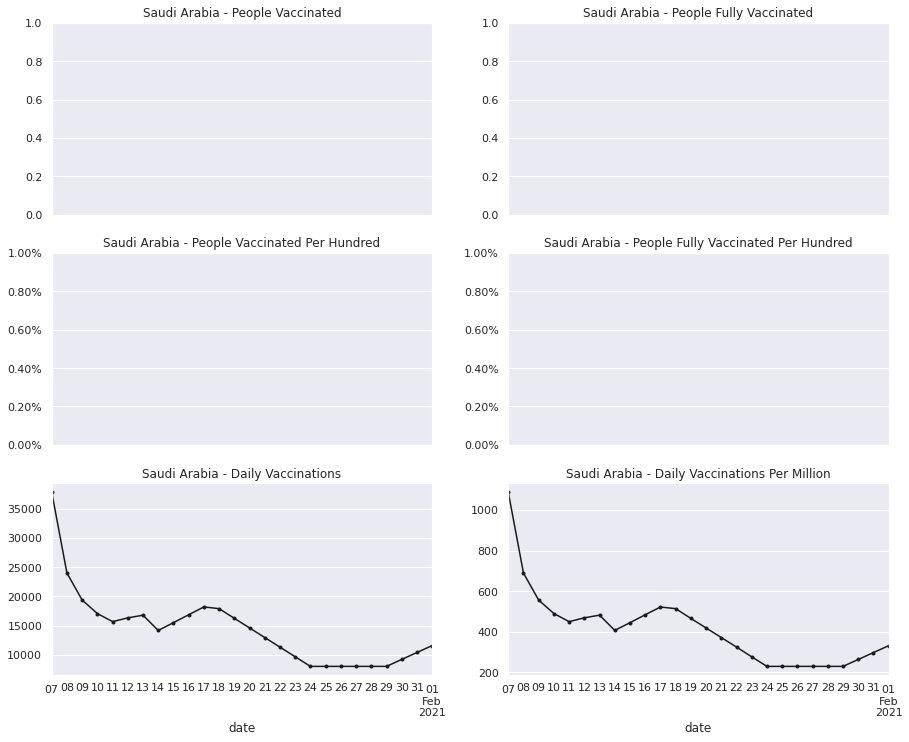

# Scotland

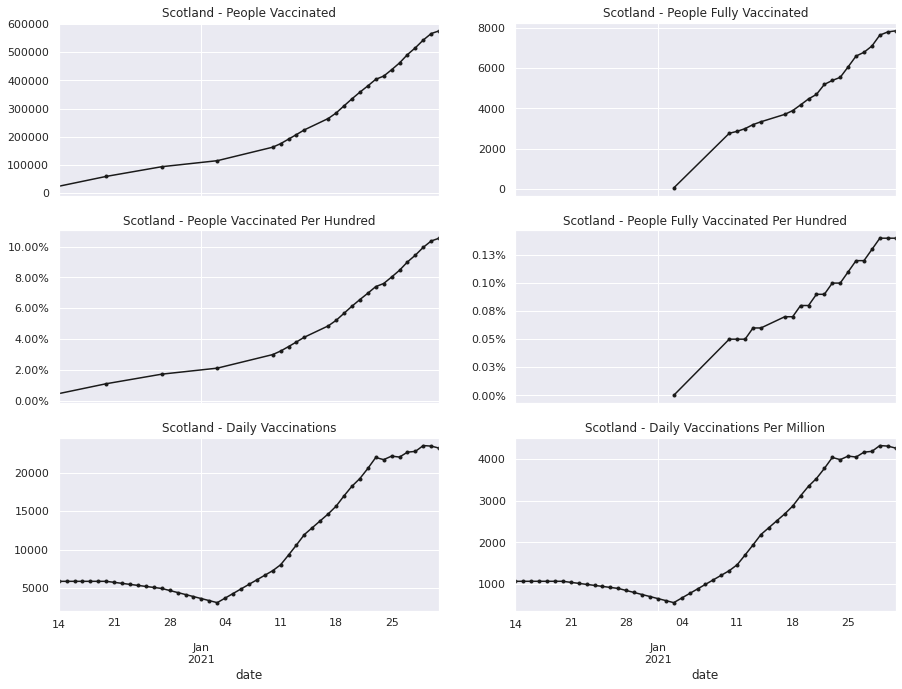

# Serbia

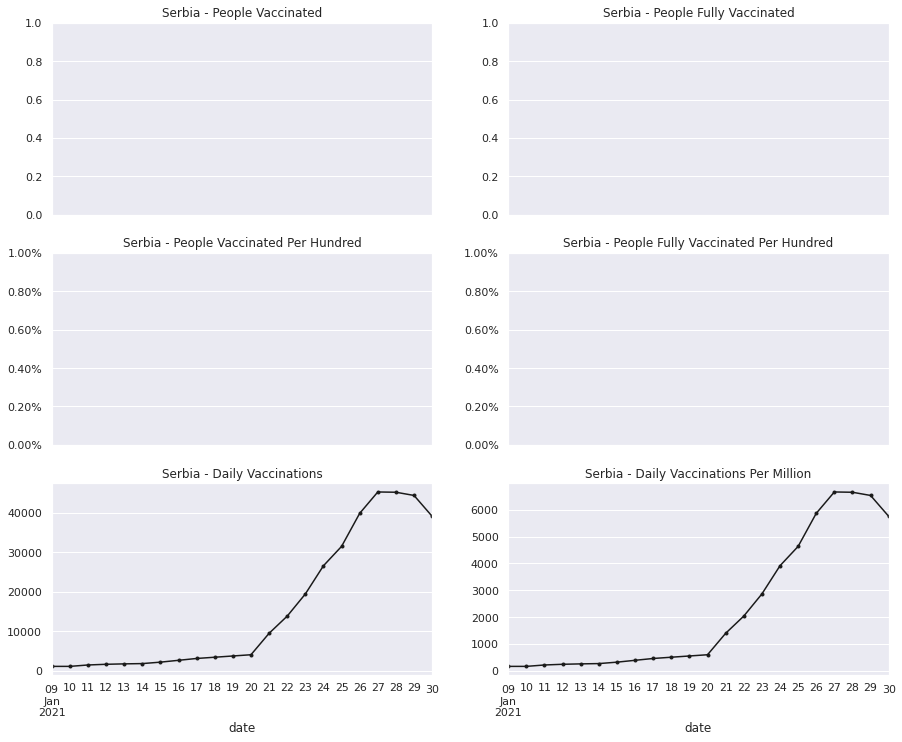

# Seychelles

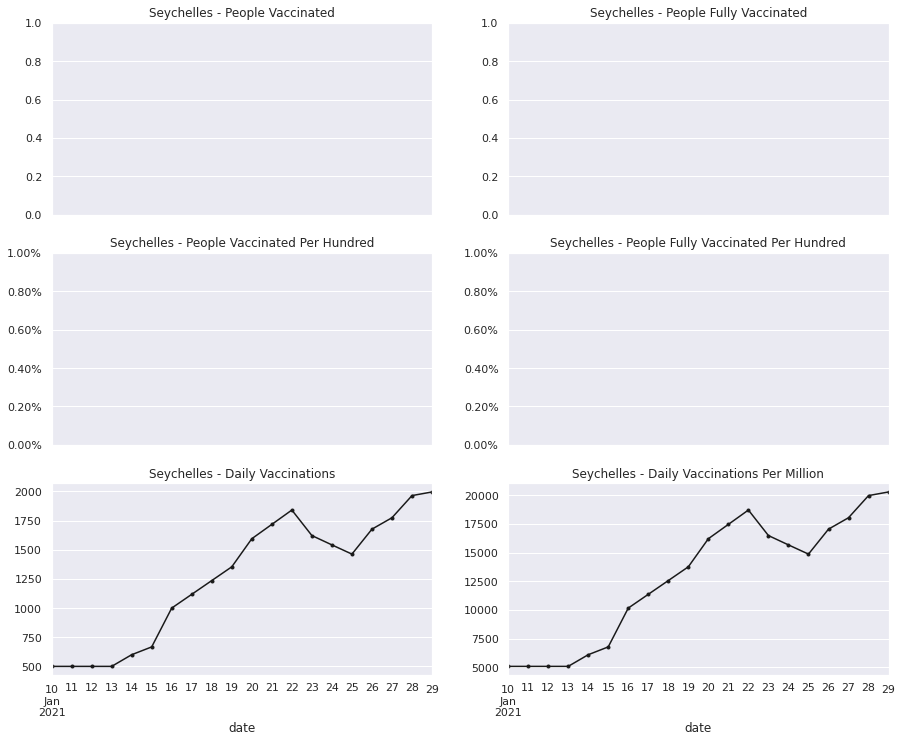

# Singapore

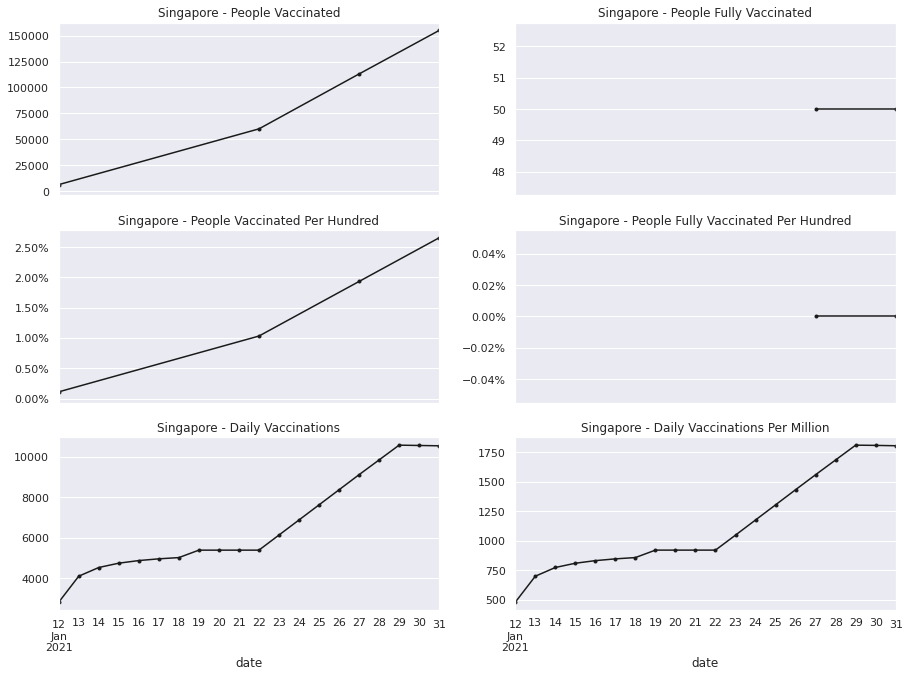

# Slovakia

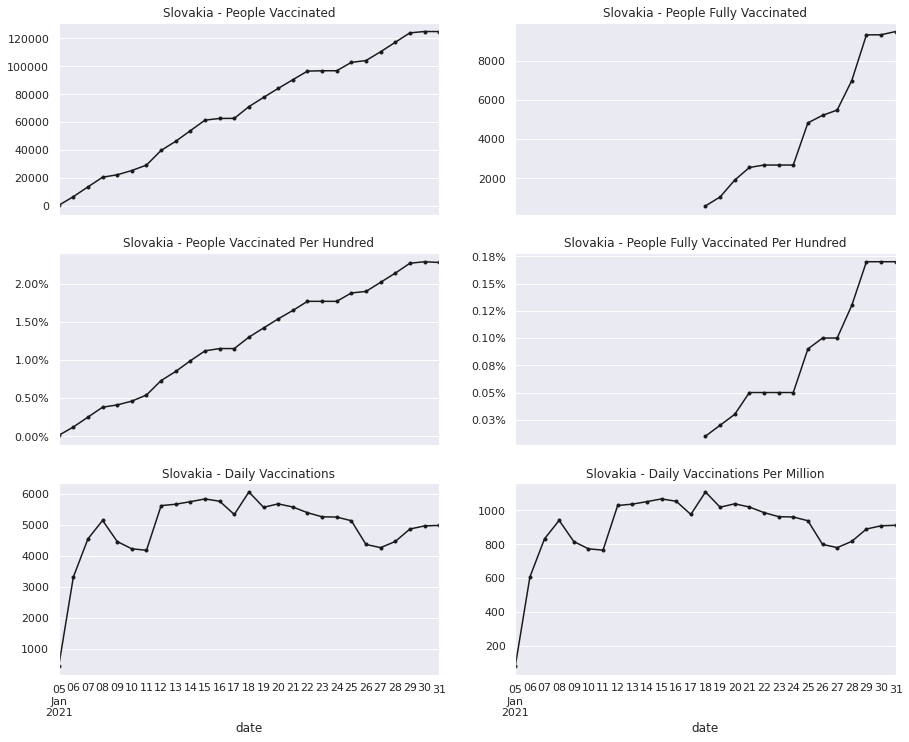

# Slovenia

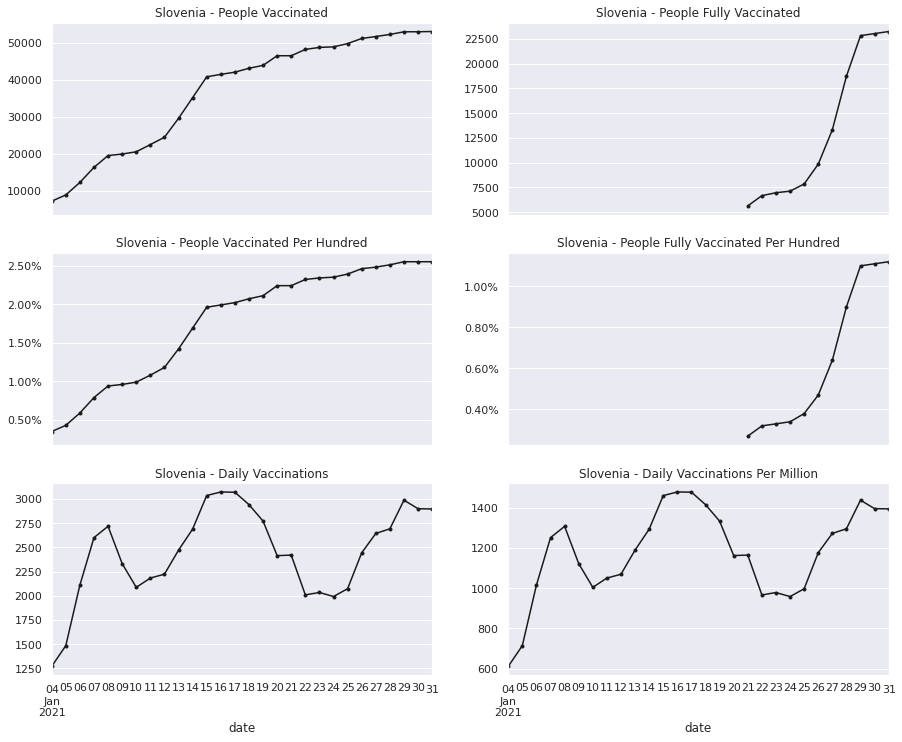

# Spain

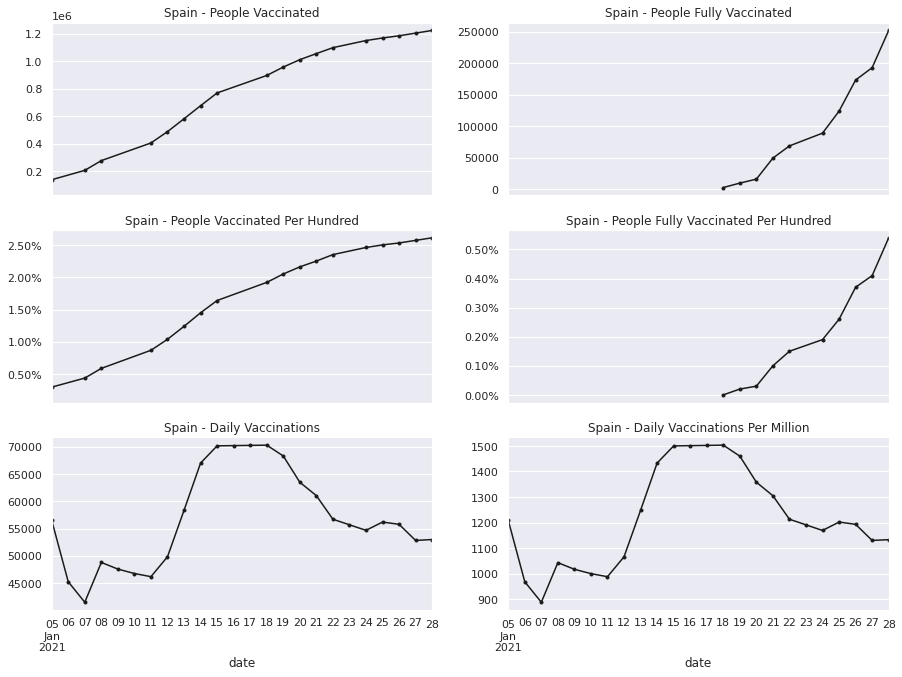

# Sri Lanka

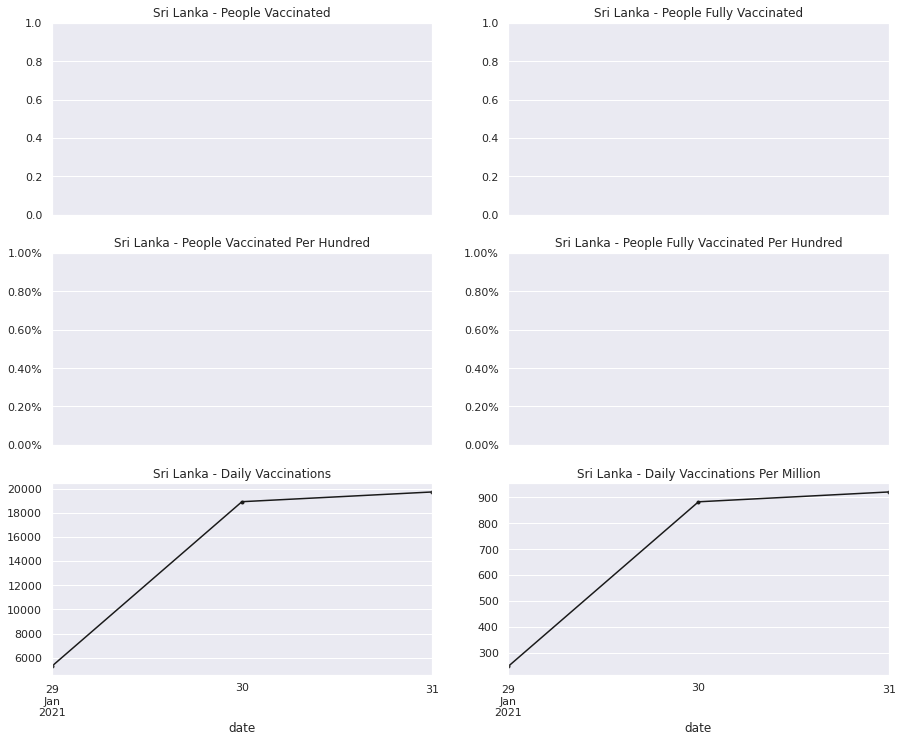

# Sweden

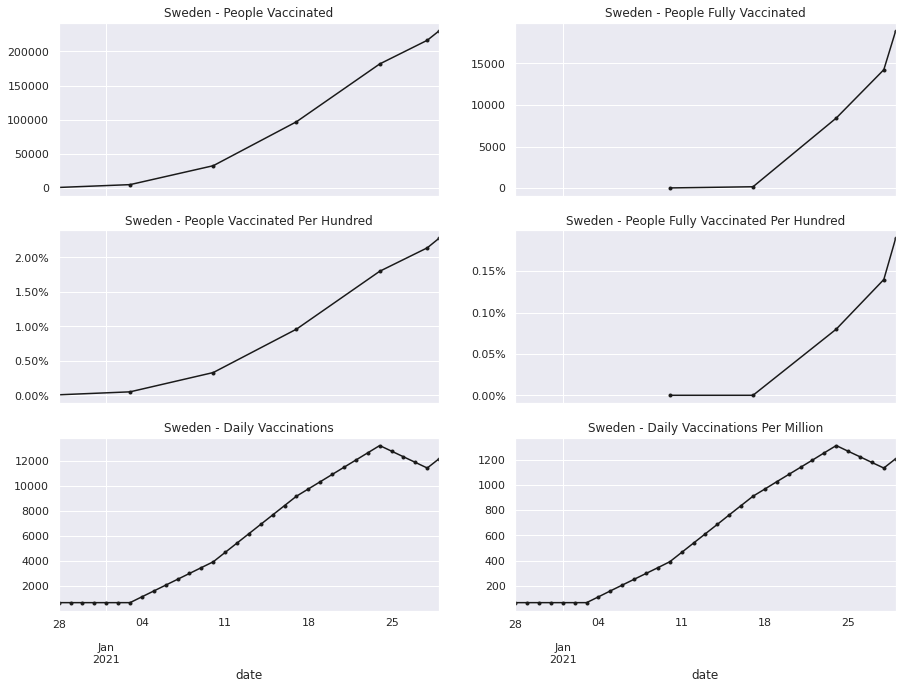

# Switzerland

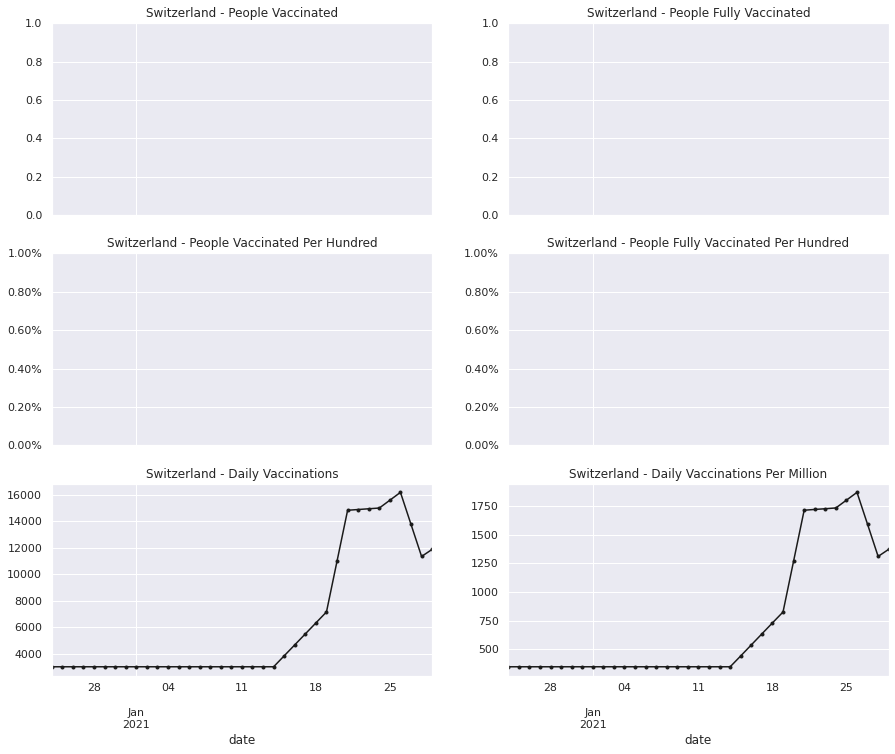

# Turkey

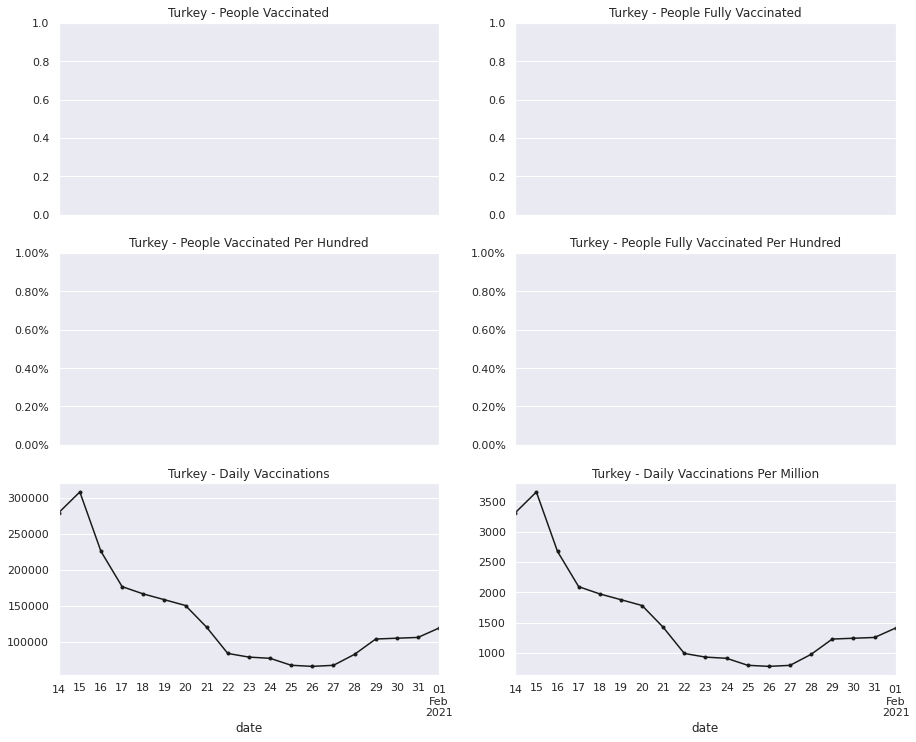

# United Arab Emirates

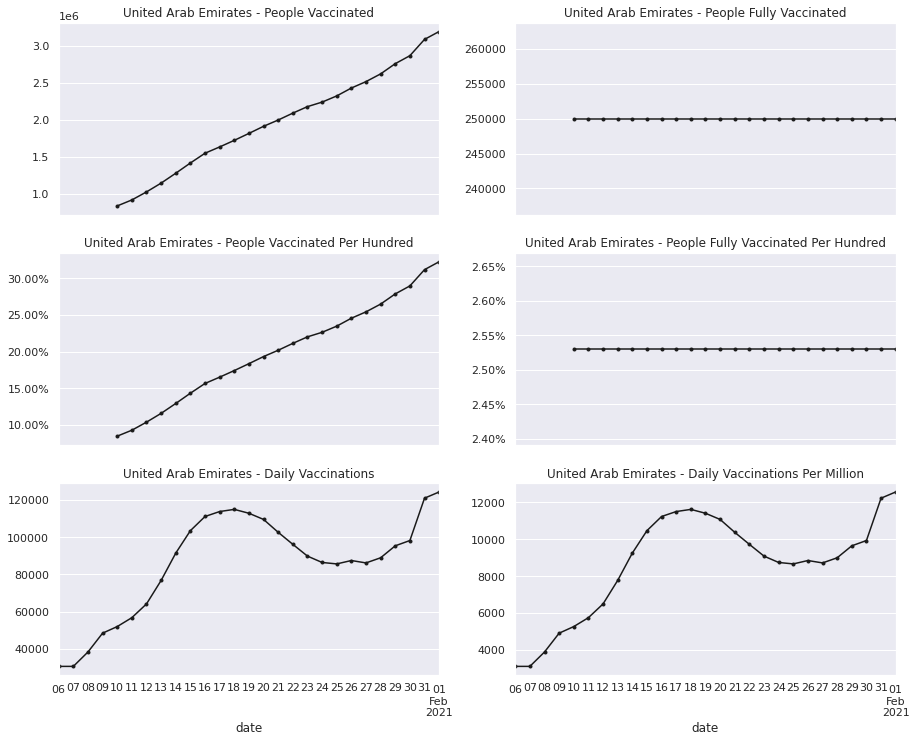

# United Kingdom

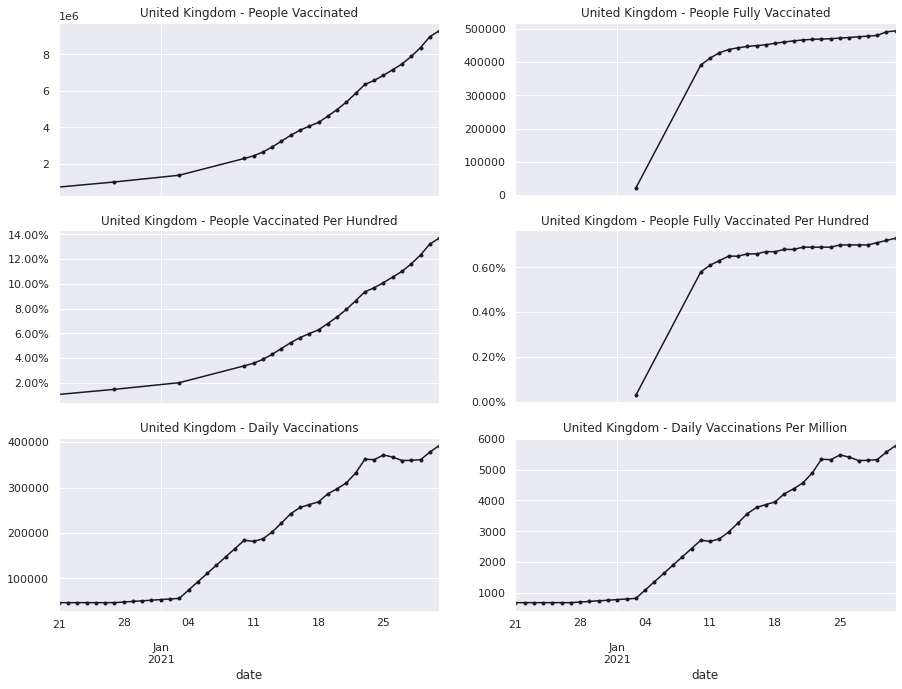

# United States

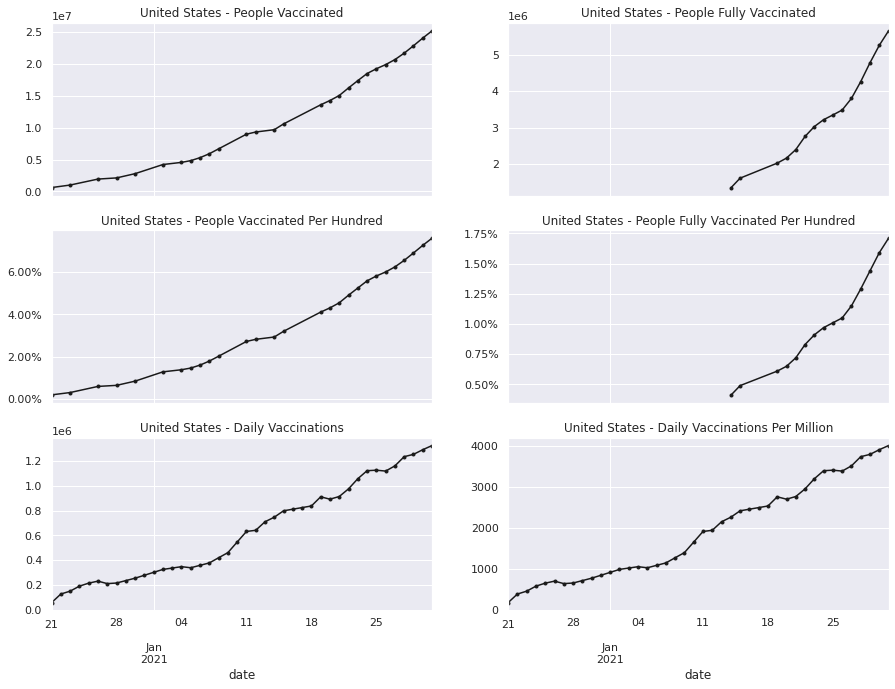

# Wales

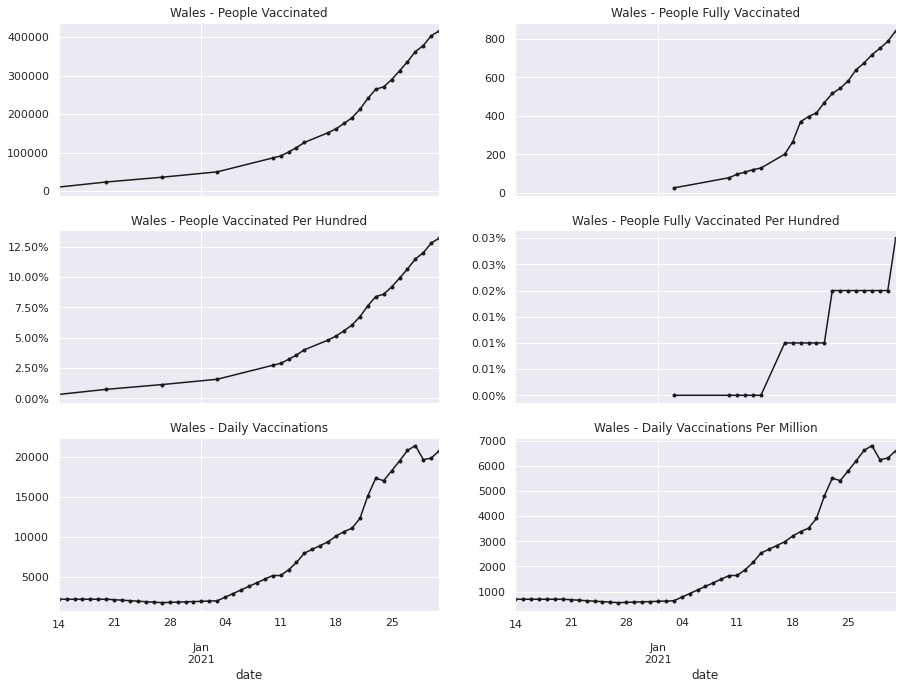

In [20]:
for country in df[df.location!='World'].location.unique():
    display(Markdown(f"# {country}"))
    _df = df[df.location==country].set_index('date')
    fig, ax = plt.subplots(3, 2, figsize=(15, 12), sharex=True)
    for i, col in enumerate(columns):
        if _df[col].dropna().size:
            _df[col].dropna().plot(y=col, ax=ax.flat[i], color='k', legend=False, marker='.')
        ax.flat[i].set(
            title=f"{country} - {col.replace('_', ' ').title()}"
        )
    ax[1,0].yaxis.set_major_formatter(mtick.PercentFormatter(100, 2))
    ax[1,1].yaxis.set_major_formatter(mtick.PercentFormatter(100, 2))
    plt.show()